# Education Trend Analysis Project

#### This project will take a deep look at education attainment trends in the US. Trended data will span from 2008 to 2017. The hypothesis is that education attainment for the categories of Master's degree and higher experienced a  bump around 2011-12 as a result of the financial meltdown of 2008. Secondary hypothesis is that this increased rate of achievement was sustained beyond the initial shock and has far reaching effect in lower education levels as well resulting in higher a higher share of the American population with higher education attainment.

In [155]:
### libraries needed for analysis

import numpy as np
import pandas as pd
import csv
import urllib
import matplotlib.pyplot as plt
from functools import reduce


In [3]:
# grab raw data

url08 = 'https://raw.githubusercontent.com/TimSrenaski/DATA201/master/ACS_08_1YR_S1501_with_ann.csv'
url09 = 'https://raw.githubusercontent.com/TimSrenaski/DATA201/master/ACS_09_1YR_S1501_with_ann.csv'
url10 = 'https://raw.githubusercontent.com/TimSrenaski/DATA201/master/ACS_10_1YR_S1501_with_ann.csv'
url11 = 'https://raw.githubusercontent.com/TimSrenaski/DATA201/master/ACS_11_1YR_S1501_with_ann.csv'
url12 = 'https://raw.githubusercontent.com/TimSrenaski/DATA201/master/ACS_12_1YR_S1501_with_ann.csv'
url13 = 'https://raw.githubusercontent.com/TimSrenaski/DATA201/master/ACS_13_1YR_S1501_with_ann.csv'
url14 = 'https://raw.githubusercontent.com/TimSrenaski/DATA201/master/ACS_14_1YR_S1501_with_ann.csv'
url15 = 'https://raw.githubusercontent.com/TimSrenaski/DATA201/master/ACS_15_1YR_S1501_with_ann.csv'
url16 = 'https://raw.githubusercontent.com/TimSrenaski/DATA201/master/ACS_16_1YR_S1501_with_ann.csv'
url17 = 'https://raw.githubusercontent.com/TimSrenaski/DATA201/master/ACS_17_1YR_S1501_with_ann.csv'

raw2008 = pd.read_csv(url08, sep=',', encoding = 'latin-1')
raw2009 = pd.read_csv(url09, sep=',', encoding = 'latin-1')
raw2010 = pd.read_csv(url10, sep=',', encoding = 'latin-1')
raw2011 = pd.read_csv(url11, sep=',', encoding = 'latin-1')
raw2012 = pd.read_csv(url12, sep=',', encoding = 'latin-1')
raw2013 = pd.read_csv(url13, sep=',', encoding = 'latin-1')
raw2014 = pd.read_csv(url14, sep=',', encoding = 'latin-1')
raw2015 = pd.read_csv(url15, sep=',', encoding = 'latin-1')
raw2016 = pd.read_csv(url16, sep=',', encoding = 'latin-1')
raw2017 = pd.read_csv(url17, sep=',', encoding = 'latin-1')

In [46]:
print('2008 data', raw2008.shape)
print('2009 data', raw2009.shape)
print('2010 data', raw2010.shape)
print('2011 data', raw2011.shape)
print('2012 data', raw2012.shape)
print('2013 data', raw2013.shape)
print('2014 data', raw2014.shape)
print('2015 data', raw2015.shape)
print('2016 data', raw2016.shape)
print('2017 data', raw2017.shape)

2008 data (791, 237)
2009 data (793, 231)
2010 data (808, 231)
2011 data (812, 231)
2012 data (815, 231)
2013 data (818, 231)
2014 data (818, 231)
2015 data (820, 771)
2016 data (821, 771)
2017 data (827, 771)


In [37]:
raw2008.head()

GEO.id GEO.id2        GEO.display-label  \
0              Id     Id2                Geography   
1  0500000US01003   01003  Baldwin County, Alabama   
2  0500000US01015   01015  Calhoun County, Alabama   
3  0500000US01043   01043  Cullman County, Alabama   
4  0500000US01049   01049   DeKalb County, Alabama   

                                HC01_EST_VC01  \
0  Total; Estimate; Population 18 to 24 years   
1                                       12936   
2                                       11159   
3                                        6618   
4                                        4776   

                                       HC01_MOE_VC01  \
0  Total; Margin of Error; Population 18 to 24 years   
1                                                894   
2                                                674   
3                                                388   
4                                                539   

                               HC02_EST_VC01  \
0  Male; Estimate; Population 18 to 24 years   
1                                       6757   
2                                       5145   
3                                       3319   
4                                       2645   

                                      HC02_MOE_VC01  \
0  Male; Margin of Error; Population 18 to 24 years   
1                                               687   
2                                               526   
3                                               321   
4                                               537   

                                 HC03_EST_VC01  \
0  Female; Estimate; Population 18 to 24 years   
1                                         6179   
2                                         6014   
3                                         3299   
4                                         2131   

                                       HC03_MOE_VC01  \
0  Female; Margin of Error; Population 18 to 24 y...   
1                                                436   
2                                                276   
3                                                274   
4                                                 81   

                                       HC01_EST_VC02  \
0  Total; Estimate; Population 18 to 24 years - L...   
1                                               24.9   
2                                               25.0   
3                                               21.0   
4                                               26.4   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

                                       HC02_EST_VC40  \
0  Male; Estimate; MEDIAN EARNINGS IN THE PAST 12...   
1                                              75431   
2                                              63094   
3                                              60695   
4                                              39268   

                                       HC02_MOE_VC40  \
0  Male; Margin of Error; MEDIAN EARNINGS IN THE ...   
1                                              24873   
2                                              30482   
3                                              18475   
4                                              42285   

                                       HC03_EST_VC40  \
0  Female; Estimate; MEDIAN EARNINGS IN THE PAST ...   
1                                              44011   
2                                              47728   
3                                              49938   
4                                              42029   

                                       HC03_MOE_VC40  \
0  Female; Margin of Error; MEDIAN EARNINGS IN TH...   

In [5]:
raw2017.head()

GEO.id GEO.id2        GEO.display-label  \
0              Id     Id2                Geography   
1  0500000US01003   01003  Baldwin County, Alabama   
2  0500000US01015   01015  Calhoun County, Alabama   
3  0500000US01043   01043  Cullman County, Alabama   
4  0500000US01049   01049   DeKalb County, Alabama   

                                HC01_EST_VC02  \
0  Total; Estimate; Population 18 to 24 years   
1                                       14570   
2                                       10146   
3                                        6747   
4                                        6773   

                                       HC01_MOE_VC02  \
0  Total; Margin of Error; Population 18 to 24 years   
1                                               1281   
2                                                799   
3                                                632   
4                                                658   

                                  HC02_EST_VC02  \
0  Percent; Estimate; Population 18 to 24 years   
1                                           (X)   
2                                           (X)   
3                                           (X)   
4                                           (X)   

                                       HC02_MOE_VC02  \
0  Percent; Margin of Error; Population 18 to 24 ...   
1                                                (X)   
2                                                (X)   
3                                                (X)   
4                                                (X)   

                               HC03_EST_VC02  \
0  Male; Estimate; Population 18 to 24 years   
1                                       7012   
2                                       5017   
3                                       3800   
4                                       3505   

                                      HC03_MOE_VC02  \
0  Male; Margin of Error; Population 18 to 24 years   
1                                               843   
2                                               653   
3                                               642   
4                                               443   

                                       HC04_EST_VC02  \
0  Percent Male; Estimate; Population 18 to 24 years   
1                                                (X)   
2                                                (X)   
3                                                (X)   
4                                                (X)   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

                                       HC02_EST_VC85  \
0  Percent; Estimate; MEDIAN EARNINGS IN THE PAST...   
1                                                (X)   
2                                                (X)   
3                                                (X)   
4                                                (X)   

                                       HC02_MOE_VC85  \
0  Percent; Margin of Error; MEDIAN EARNINGS IN T...   
1                                                (X)   
2                                                (X)   
3                                                (X)   
4                                                (X)   

                                       HC03_EST_VC85  \
0  Male; Estimate; MEDIAN EARNINGS IN THE PAST 12...   
1                                              67950   
2                                              81540   
3                                              75664   
4                                              54271   

                                       HC03_MOE_VC85  \
0  Male; Margin of Error; MEDIAN EARNINGS IN THE 

In [6]:
# clean and organize raw data




## create data table to trend each education attainment level that only includes county name, percent of pop for each year
### Less than high school education table
lessThanHighschool08 = raw2008[['GEO.display-label', 'HC01_EST_VC07']]
lessThanHighschool09 = raw2009[['GEO.display-label', 'HC01_EST_VC07']]
lessThanHighschool10 = raw2010[['GEO.display-label', 'HC01_EST_VC08']]
lessThanHighschool11 = raw2011[['GEO.display-label', 'HC01_EST_VC08']]
lessThanHighschool12 = raw2012[['GEO.display-label', 'HC01_EST_VC08']]
lessThanHighschool13 = raw2013[['GEO.display-label', 'HC01_EST_VC08']]
lessThanHighschool14 = raw2014[['GEO.display-label', 'HC01_EST_VC08']]
lessThanHighschool15 = raw2015[['GEO.display-label', 'HC02_EST_VC09']]
lessThanHighschool16 = raw2016[['GEO.display-label', 'HC02_EST_VC09']]
lessThanHighschool17 = raw2017[['GEO.display-label', 'HC02_EST_VC09']]

dfs = [lessThanHighschool08, lessThanHighschool09, lessThanHighschool10, lessThanHighschool11,
      lessThanHighschool12, lessThanHighschool13, lessThanHighschool14, lessThanHighschool15,
      lessThanHighschool16, lessThanHighschool17]

lessThanHighschoolTrendClean = reduce(lambda left, right: pd.merge(left, right, on='GEO.display-label'), dfs)

lessThanHighschoolTrendClean.columns = ['County', 'Share2008',
                                  'Share2009',
                                  'Share2010',
                                  'Share2011',
                                  'Share2012',
                                  'Share2013',
                                  'Share2014',
                                  'Share2015',
                                  'Share2016',
                                  'Share2017']


#lessThanHighschoolTrendClean

### High school education but no diploma education table
noDiploma08 = raw2008[['GEO.display-label', 'HC01_EST_VC08']]
noDiploma09 = raw2009[['GEO.display-label', 'HC01_EST_VC08']]
noDiploma10 = raw2010[['GEO.display-label', 'HC01_EST_VC09']]
noDiploma11 = raw2011[['GEO.display-label', 'HC01_EST_VC09']]
noDiploma12 = raw2012[['GEO.display-label', 'HC01_EST_VC09']]
noDiploma13 = raw2013[['GEO.display-label', 'HC01_EST_VC09']]
noDiploma14 = raw2014[['GEO.display-label', 'HC01_EST_VC09']]
noDiploma15 = raw2015[['GEO.display-label', 'HC02_EST_VC10']]
noDiploma16 = raw2016[['GEO.display-label', 'HC02_EST_VC10']]
noDiploma17 = raw2017[['GEO.display-label', 'HC02_EST_VC10']]

dfs = [noDiploma08, noDiploma09, noDiploma10, noDiploma11,
      noDiploma12, noDiploma13, noDiploma14, noDiploma15,
      noDiploma16, noDiploma17]

noDiplomaTrendClean = reduce(lambda left, right: pd.merge(left, right, on='GEO.display-label'), dfs)

noDiplomaTrendClean.columns = ['County', 'Share2008',
                                  'Share2009',
                                  'Share2010',
                                  'Share2011',
                                  'Share2012',
                                  'Share2013',
                                  'Share2014',
                                  'Share2015',
                                  'Share2016',
                                  'Share2017']


#noDiplomaTrendClean

### High school graduate education table
hsGrad08 = raw2008[['GEO.display-label', 'HC01_EST_VC09']]
hsGrad09 = raw2009[['GEO.display-label', 'HC01_EST_VC09']]
hsGrad10 = raw2010[['GEO.display-label', 'HC01_EST_VC10']]
hsGrad11 = raw2011[['GEO.display-label', 'HC01_EST_VC10']]
hsGrad12 = raw2012[['GEO.display-label', 'HC01_EST_VC10']]
hsGrad13 = raw2013[['GEO.display-label', 'HC01_EST_VC10']]
hsGrad14 = raw2014[['GEO.display-label', 'HC01_EST_VC10']]
hsGrad15 = raw2015[['GEO.display-label', 'HC02_EST_VC11']]
hsGrad16 = raw2016[['GEO.display-label', 'HC02_EST_VC11']]
hsGrad17 = raw2017[['GEO.display-label', 'HC02_EST_VC11']]

dfs = [hsGrad08, hsGrad09, hsGrad10, hsGrad11,
      hsGrad12, hsGrad13, hsGrad14, hsGrad15,
      hsGrad16, hsGrad17]

hsGradTrendClean = reduce(lambda left, right: pd.merge(left, right, on='GEO.display-label'), dfs)

hsGradTrendClean.columns = ['County', 'Share2008',
                                  'Share2009',
                                  'Share2010',
                                  'Share2011',
                                  'Share2012',
                                  'Share2013',
                                  'Share2014',
                                  'Share2015',
                                  'Share2016',
                                  'Share2017']


#hsGradTrendClean

### Some college education table
someCollege08 = raw2008[['GEO.display-label', 'HC01_EST_VC10']]
someCollege09 = raw2009[['GEO.display-label', 'HC01_EST_VC10']]
someCollege10 = raw2010[['GEO.display-label', 'HC01_EST_VC11']]
someCollege11 = raw2011[['GEO.display-label', 'HC01_EST_VC11']]
someCollege12 = raw2012[['GEO.display-label', 'HC01_EST_VC11']]
someCollege13 = raw2013[['GEO.display-label', 'HC01_EST_VC11']]
someCollege14 = raw2014[['GEO.display-label', 'HC01_EST_VC11']]
someCollege15 = raw2015[['GEO.display-label', 'HC02_EST_VC12']]
someCollege16 = raw2016[['GEO.display-label', 'HC02_EST_VC12']]
someCollege17 = raw2017[['GEO.display-label', 'HC02_EST_VC12']]

dfs = [someCollege08, someCollege09, someCollege10, someCollege11,
      someCollege12, someCollege13, someCollege14, someCollege15,
      someCollege16, someCollege17]

someCollegeTrendClean = reduce(lambda left, right: pd.merge(left, right, on='GEO.display-label'), dfs)

someCollegeTrendClean.columns = ['County', 'Share2008',
                                  'Share2009',
                                  'Share2010',
                                  'Share2011',
                                  'Share2012',
                                  'Share2013',
                                  'Share2014',
                                  'Share2015',
                                  'Share2016',
                                  'Share2017']


#someCollegeTrendClean

### Associate Degree education table
associate08 = raw2008[['GEO.display-label', 'HC01_EST_VC11']]
associate09 = raw2009[['GEO.display-label', 'HC01_EST_VC11']]
associate10 = raw2010[['GEO.display-label', 'HC01_EST_VC12']]
associate11 = raw2011[['GEO.display-label', 'HC01_EST_VC12']]
associate12 = raw2012[['GEO.display-label', 'HC01_EST_VC12']]
associate13 = raw2013[['GEO.display-label', 'HC01_EST_VC12']]
associate14 = raw2014[['GEO.display-label', 'HC01_EST_VC12']]
associate15 = raw2015[['GEO.display-label', 'HC02_EST_VC13']]
associate16 = raw2016[['GEO.display-label', 'HC02_EST_VC13']]
associate17 = raw2017[['GEO.display-label', 'HC02_EST_VC13']]

dfs = [associate08, associate09, associate10, associate11,
      associate12, associate13, associate14, associate15,
      associate16, associate17]

associateTrendClean = reduce(lambda left, right: pd.merge(left, right, on='GEO.display-label'), dfs)

associateTrendClean.columns = ['County', 'Share2008',
                                  'Share2009',
                                  'Share2010',
                                  'Share2011',
                                  'Share2012',
                                  'Share2013',
                                  'Share2014',
                                  'Share2015',
                                  'Share2016',
                                  'Share2017']


#associateTrendClean

### Bachelor Degree education table
bachelor08 = raw2008[['GEO.display-label', 'HC01_EST_VC12']]
bachelor09 = raw2009[['GEO.display-label', 'HC01_EST_VC12']]
bachelor10 = raw2010[['GEO.display-label', 'HC01_EST_VC13']]
bachelor11 = raw2011[['GEO.display-label', 'HC01_EST_VC13']]
bachelor12 = raw2012[['GEO.display-label', 'HC01_EST_VC13']]
bachelor13 = raw2013[['GEO.display-label', 'HC01_EST_VC13']]
bachelor14 = raw2014[['GEO.display-label', 'HC01_EST_VC13']]
bachelor15 = raw2015[['GEO.display-label', 'HC02_EST_VC14']]
bachelor16 = raw2016[['GEO.display-label', 'HC02_EST_VC14']]
bachelor17 = raw2017[['GEO.display-label', 'HC02_EST_VC14']]

dfs = [bachelor08, bachelor09, bachelor10, bachelor11,
      bachelor12, bachelor13, bachelor14, bachelor15,
      bachelor16, bachelor17]

bachelorTrendClean = reduce(lambda left, right: pd.merge(left, right, on='GEO.display-label'), dfs)

bachelorTrendClean.columns = ['County', 'Share2008',
                                  'Share2009',
                                  'Share2010',
                                  'Share2011',
                                  'Share2012',
                                  'Share2013',
                                  'Share2014',
                                  'Share2015',
                                  'Share2016',
                                  'Share2017']


#bachelorTrendClean

### Graduate or Professional Degree education table
grad08 = raw2008[['GEO.display-label', 'HC01_EST_VC13']]
grad09 = raw2009[['GEO.display-label', 'HC01_EST_VC13']]
grad10 = raw2010[['GEO.display-label', 'HC01_EST_VC14']]
grad11 = raw2011[['GEO.display-label', 'HC01_EST_VC14']]
grad12 = raw2012[['GEO.display-label', 'HC01_EST_VC14']]
grad13 = raw2013[['GEO.display-label', 'HC01_EST_VC14']]
grad14 = raw2014[['GEO.display-label', 'HC01_EST_VC14']]
grad15 = raw2015[['GEO.display-label', 'HC02_EST_VC15']]
grad16 = raw2016[['GEO.display-label', 'HC02_EST_VC15']]
grad17 = raw2017[['GEO.display-label', 'HC02_EST_VC15']]

dfs = [grad08, grad09, grad10, grad11,
      grad12, grad13, grad14, grad15,
      grad16, grad17]

gradTrendClean = reduce(lambda left, right: pd.merge(left, right, on='GEO.display-label'), dfs)

gradTrendClean.columns = ['County', 'Share2008',
                                  'Share2009',
                                  'Share2010',
                                  'Share2011',
                                  'Share2012',
                                  'Share2013',
                                  'Share2014',
                                  'Share2015',
                                  'Share2016',
                                  'Share2017']


gradTrendClean

County  \
0                               Geography   
1                 Baldwin County, Alabama   
2                 Calhoun County, Alabama   
3                 Cullman County, Alabama   
4                  DeKalb County, Alabama   
5                  Elmore County, Alabama   
6                  Etowah County, Alabama   
7                 Houston County, Alabama   
8               Jefferson County, Alabama   
9              Lauderdale County, Alabama   
10                    Lee County, Alabama   
11              Limestone County, Alabama   
12                Madison County, Alabama   
13               Marshall County, Alabama   
14                 Mobile County, Alabama   
15             Montgomery County, Alabama   
16                 Morgan County, Alabama   
17              St. Clair County, Alabama   
18                 Shelby County, Alabama   
19              Talladega County, Alabama   
20             Tuscaloosa County, Alabama   
21                 Walker County, Alabama   
22         Anchorage Municipality, Alaska   
23   Fairbanks North Star Borough, Alaska   
24      Matanuska-Susitna Borough, Alaska   
25                 Apache County, Arizona   
26                Cochise County, Arizona   
27               Coconino County, Arizona   
28               Maricopa County, Arizona   
29                 Mohave County, Arizona   
..                                    ...   
759        Harrison County, West Virginia   
760         Kanawha County, West Virginia   
761      Monongalia County, West Virginia   
762         Raleigh County, West Virginia   
763            Wood County, West Virginia   
764               Brown County, Wisconsin   
765                Dane County, Wisconsin   
766               Dodge County, Wisconsin   
767          Eau Claire County, Wisconsin   
768         Fond du Lac County, Wisconsin   
769           Jefferson County, Wisconsin   
770             Kenosha County, Wisconsin   
771           La Crosse County, Wisconsin   
772           Manitowoc County, Wisconsin   
773            Marathon County, Wisconsin   
774           Milwaukee County, Wisconsin   
775           Outagamie County, Wisconsin   
776             Ozaukee County, Wisconsin   
777             Portage County, Wisconsin   
778              Racine County, Wisconsin   
779                Rock County, Wisconsin   
780           St. Croix County, Wisconsin   
781           Sheboygan County, Wisconsin   
782            Walworth County, Wisconsin   
783          Washington County, Wisconsin   
784            Waukesha County, Wisconsin   
785           Winnebago County, Wisconsin   
786                Wood County, Wisconsin   
787               Laramie County, Wyoming   
788               Natrona County, Wyoming   

                                             Share2008  \
0    Total; Estimate; Population 25 years and over ...   
1                                                  8.7   
2                                                  6.6   
3                                                  5.4   
4                                                  3.5   
5                                                  5.9   
6                                                  7.6   
7                                                  6.7   
8                                                 10.3   
9                                                  8.3   
10                                                13.7   
11                                                 6.3   
12                                                12.5   
13                                                 4.9   
14                                                 6.9   
15                                                11.3   
16                                                 4.9   
17                                                 3.7   
18                                                13.1   
19                                                 3.4   
20                        

In [7]:
#Remove column headers
## Less than high school education
lessThanHighschoolTrendClean = lessThanHighschoolTrendClean.drop(lessThanHighschoolTrendClean.index[0])
#lessThanHighschoolTrendClean

## High school education but no diploma
noDiplomaTrendClean = noDiplomaTrendClean.drop(noDiplomaTrendClean.index[0])
#noDiplomaTrendClean

## High school graduate
hsGradTrendClean = hsGradTrendClean.drop(hsGradTrendClean.index[0])
#hsGradTrendClean

## Some college
someCollegeTrendClean = someCollegeTrendClean.drop(someCollegeTrendClean.index[0])
#someCollegeTrendClean

## Associate degree
associateTrendClean = associateTrendClean.drop(associateTrendClean.index[0])
#associateTrendClean

## Bachelor degree
bachelorTrendClean = bachelorTrendClean.drop(bachelorTrendClean.index[0])
#bachelorTrendClean

## Graduate or Professional degree
gradTrendClean = gradTrendClean.drop(gradTrendClean.index[0])
gradTrendClean

County Share2008 Share2009 Share2010  \
1                 Baldwin County, Alabama       8.7       8.5       7.4   
2                 Calhoun County, Alabama       6.6       6.8       5.0   
3                 Cullman County, Alabama       5.4       5.1       5.2   
4                  DeKalb County, Alabama       3.5       3.5       4.2   
5                  Elmore County, Alabama       5.9       7.7       8.1   
6                  Etowah County, Alabama       7.6       4.6       4.7   
7                 Houston County, Alabama       6.7       6.6       6.9   
8               Jefferson County, Alabama      10.3      10.5      10.6   
9              Lauderdale County, Alabama       8.3       6.3       9.0   
10                    Lee County, Alabama      13.7      12.3      14.0   
11              Limestone County, Alabama       6.3       4.8       7.8   
12                Madison County, Alabama      12.5      13.4      14.8   
13               Marshall County, Alabama       4.9       4.4       5.4   
14                 Mobile County, Alabama       6.9       6.2       7.0   
15             Montgomery County, Alabama      11.3      11.3      13.6   
16                 Morgan County, Alabama       4.9       6.2       5.2   
17              St. Clair County, Alabama       3.7       4.4       3.3   
18                 Shelby County, Alabama      13.1      11.8      12.1   
19              Talladega County, Alabama       3.4       5.9       4.6   
20             Tuscaloosa County, Alabama      10.4      11.1      11.1   
21                 Walker County, Alabama       5.6       3.8       2.6   
22         Anchorage Municipality, Alaska      12.1      10.4      11.3   
23   Fairbanks North Star Borough, Alaska      11.4      11.2       9.6   
24      Matanuska-Susitna Borough, Alaska       7.0       5.1       6.9   
25                 Apache County, Arizona       3.6       2.5       3.8   
26                Cochise County, Arizona       8.5       9.1       7.5   
27               Coconino County, Arizona      11.9      12.0      13.4   
28               Maricopa County, Arizona       9.7      10.0       9.6   
29                 Mohave County, Arizona       3.3       3.7       4.6   
30                 Navajo County, Arizona       5.4       4.5       6.5   
..                                    ...       ...       ...       ...   
759        Harrison County, West Virginia       3.8       7.2       8.6   
760         Kanawha County, West Virginia       9.1       9.3      10.2   
761      Monongalia County, West Virginia      19.1      19.3      16.9   
762         Raleigh County, West Virginia       6.3       4.9       7.1   
763            Wood County, West Virginia       6.0       6.7       6.3   
764               Brown County, Wisconsin       7.3       6.6       7.0   
765                Dane County, Wisconsin      18.1      17.0      19.0   
766               Dodge County, Wisconsin       4.6       3.9       4.3   
767          Eau Claire County, Wisconsin      10.1       7.8      11.0   
768         Fond du Lac County, Wisconsin       6.7       5.6       5.5   
769           Jefferson County, Wisconsin       7.4       8.2       7.9   
770             Kenosha County, Wisconsin       7.6       6.2       6.9   
771           La Crosse County, Wisconsin      10.4      10.2      11.9   
772           Manitowoc County, Wisconsin       4.8       6.5       5.1   
773            Marathon County, Wisconsin       7.5       7.2       5.9   
774           Milwaukee County, Wisconsin       9.8       9.7       9.8   
775           Outagamie County, Wisconsin       7.1       5.9       7.6   
776             Ozaukee County, Wisconsin      14.8      13.3      20.3   
777             Portage County, Wisconsin       8.7       9.1       7.8   
778              Racine County, Wisconsin       7.5       6.7       8.3   
779                Rock County, Wisconsin       7.6       5.2       6.7   
780           St. Croix County, Wisconsin       8.8       7.

In [8]:
#Convert column data types from objects to float
## Less than high school education
lessThanHighschoolTrendClean[['Share2008',
                             'Share2009',
                             'Share2010',
                             'Share2011',
                             'Share2012',
                             'Share2013',
                             'Share2014',
                             'Share2015',
                             'Share2016',
                             'Share2017']] = lessThanHighschoolTrendClean[['Share2008', 'Share2009', 'Share2010',
                                                                          'Share2011', 'Share2012', 'Share2013',
                                                                          'Share2014', 'Share2015', 'Share2016',
                                                                          'Share2017']].apply(pd.to_numeric)

#lessThanHighschoolTrendClean.dtypes

## High school education but no diploma
noDiplomaTrendClean[['Share2008',
                             'Share2009',
                             'Share2010',
                             'Share2011',
                             'Share2012',
                             'Share2013',
                             'Share2014',
                             'Share2015',
                             'Share2016',
                             'Share2017']] = noDiplomaTrendClean[['Share2008', 'Share2009', 'Share2010',
                                                                          'Share2011', 'Share2012', 'Share2013',
                                                                          'Share2014', 'Share2015', 'Share2016',
                                                                          'Share2017']].apply(pd.to_numeric)

#noDiplomaTrendClean.dtypes

## High school graduate
hsGradTrendClean[['Share2008',
                             'Share2009',
                             'Share2010',
                             'Share2011',
                             'Share2012',
                             'Share2013',
                             'Share2014',
                             'Share2015',
                             'Share2016',
                             'Share2017']] = hsGradTrendClean[['Share2008', 'Share2009', 'Share2010',
                                                                          'Share2011', 'Share2012', 'Share2013',
                                                                          'Share2014', 'Share2015', 'Share2016',
                                                                          'Share2017']].apply(pd.to_numeric)

#hsGradTrendClean.dtypes

## Some College
someCollegeTrendClean[['Share2008',
                             'Share2009',
                             'Share2010',
                             'Share2011',
                             'Share2012',
                             'Share2013',
                             'Share2014',
                             'Share2015',
                             'Share2016',
                             'Share2017']] = someCollegeTrendClean[['Share2008', 'Share2009', 'Share2010',
                                                                          'Share2011', 'Share2012', 'Share2013',
                                                                          'Share2014', 'Share2015', 'Share2016',
                                                                          'Share2017']].apply(pd.to_numeric)

#someCollegeTrendClean.dtypes

## Associate degree
associateTrendClean[['Share2008',
                             'Share2009',
                             'Share2010',
                             'Share2011',
                             'Share2012',
                             'Share2013',
                             'Share2014',
                             'Share2015',
                             'Share2016',
                             'Share2017']] = associateTrendClean[['Share2008', 'Share2009', 'Share2010',
                                                                          'Share2011', 'Share2012', 'Share2013',
                                                                          'Share2014', 'Share2015', 'Share2016',
                                                                          'Share2017']].apply(pd.to_numeric)

#associateTrendClean.dtypes

## Bachelor degree
bachelorTrendClean[['Share2008',
                             'Share2009',
                             'Share2010',
                             'Share2011',
                             'Share2012',
                             'Share2013',
                             'Share2014',
                             'Share2015',
                             'Share2016',
                             'Share2017']] = bachelorTrendClean[['Share2008', 'Share2009', 'Share2010',
                                                                          'Share2011', 'Share2012', 'Share2013',
                                                                          'Share2014', 'Share2015', 'Share2016',
                                                                          'Share2017']].apply(pd.to_numeric)

#bachelorTrendClean.dtypes

## Graduate or Professional degree
gradTrendClean[['Share2008',
                             'Share2009',
                             'Share2010',
                             'Share2011',
                             'Share2012',
                             'Share2013',
                             'Share2014',
                             'Share2015',
                             'Share2016',
                             'Share2017']] = gradTrendClean[['Share2008', 'Share2009', 'Share2010',
                                                                          'Share2011', 'Share2012', 'Share2013',
                                                                          'Share2014', 'Share2015', 'Share2016',
                                                                          'Share2017']].apply(pd.to_numeric)

gradTrendClean.dtypes

County        object
Share2008    float64
Share2009    float64
Share2010    float64
Share2011    float64
Share2012    float64
Share2013    float64
Share2014    float64
Share2015    float64
Share2016    float64
Share2017    float64
dtype: object

In [9]:
# Find the mean share across the nation

## Less than a high school education
lessThanHighschoolTrendClean.loc["Median"]=lessThanHighschoolTrendClean.median(axis=0)
#lessThanHighschoolTrendClean

## High school education no diploma
noDiplomaTrendClean.loc["Median"]=noDiplomaTrendClean.median(axis=0)
#noDiplomaTrendClean

## High school graduate
hsGradTrendClean.loc["Median"]=hsGradTrendClean.median(axis=0)
#hsGradTrendClean

## Some college
someCollegeTrendClean.loc["Median"]=someCollegeTrendClean.median(axis=0)
#someCollegeTrendClean

## Associate Degree
associateTrendClean.loc["Median"]=associateTrendClean.median(axis=0)
#associateTrendClean

## Bachelor Degree
bachelorTrendClean.loc["Median"]=bachelorTrendClean.median(axis=0)
#bachelorTrendClean

## Graduate or Professional Degree
gradTrendClean.loc["Median"]=gradTrendClean.median(axis=0)
gradTrendClean

County  Share2008  Share2009  Share2010  \
1                    Baldwin County, Alabama        8.7        8.5        7.4   
2                    Calhoun County, Alabama        6.6        6.8        5.0   
3                    Cullman County, Alabama        5.4        5.1        5.2   
4                     DeKalb County, Alabama        3.5        3.5        4.2   
5                     Elmore County, Alabama        5.9        7.7        8.1   
6                     Etowah County, Alabama        7.6        4.6        4.7   
7                    Houston County, Alabama        6.7        6.6        6.9   
8                  Jefferson County, Alabama       10.3       10.5       10.6   
9                 Lauderdale County, Alabama        8.3        6.3        9.0   
10                       Lee County, Alabama       13.7       12.3       14.0   
11                 Limestone County, Alabama        6.3        4.8        7.8   
12                   Madison County, Alabama       12.5       13.4       14.8   
13                  Marshall County, Alabama        4.9        4.4        5.4   
14                    Mobile County, Alabama        6.9        6.2        7.0   
15                Montgomery County, Alabama       11.3       11.3       13.6   
16                    Morgan County, Alabama        4.9        6.2        5.2   
17                 St. Clair County, Alabama        3.7        4.4        3.3   
18                    Shelby County, Alabama       13.1       11.8       12.1   
19                 Talladega County, Alabama        3.4        5.9        4.6   
20                Tuscaloosa County, Alabama       10.4       11.1       11.1   
21                    Walker County, Alabama        5.6        3.8        2.6   
22            Anchorage Municipality, Alaska       12.1       10.4       11.3   
23      Fairbanks North Star Borough, Alaska       11.4       11.2        9.6   
24         Matanuska-Susitna Borough, Alaska        7.0        5.1        6.9   
25                    Apache County, Arizona        3.6        2.5        3.8   
26                   Cochise County, Arizona        8.5        9.1        7.5   
27                  Coconino County, Arizona       11.9       12.0       13.4   
28                  Maricopa County, Arizona        9.7       10.0        9.6   
29                    Mohave County, Arizona        3.3        3.7        4.6   
30                    Navajo County, Arizona        5.4        4.5        6.5   
...                                      ...        ...        ...        ...   
760            Kanawha County, West Virginia        9.1        9.3       10.2   
761         Monongalia County, West Virginia       19.1       19.3       16.9   
762            Raleigh County, West Virginia        6.3        4.9        7.1   
763               Wood County, West Virginia        6.0        6.7        6.3   
764                  Brown County, Wisconsin        7.3        6.6        7.0   
765                   Dane County, Wisconsin       18.1       17.0       19.0   
766                  Dodge County, Wisconsin        4.6        3.9        4.3   
767             Eau Claire County, Wisconsin       10.1        7.8       11.0   
768            Fond du Lac County, Wisconsin        6.7        5.6        5.5   
769              Jefferson County, Wisconsin        7.4        8.2        7.9   
770                Kenosha County, Wisconsin        7.6        6.2        6.9   
771              La Crosse County, Wisconsin       10.4       10.2       11.9   
772              Manitowoc County, Wisconsin        4.8        6.5        5.1   
773               Marathon County, Wisconsin        7.5        7.2        5.9   
774              Milwaukee County, Wisconsin        9.8        9.7        9.8   
775              Outagamie County, Wisconsin        7.1        5.9        7.6   
776                Ozaukee County, Wisconsin       14.8       13.3       20.3   
777                Portage County, Wisconsin        8.7        9.1   

In [10]:
#Prepare the table for graphing by transposing the data and adding a year column

## Less than a high school education
lessThanHighschoolTrendCleanT = lessThanHighschoolTrendClean.T
lessThanHighschoolTrendCleanT = lessThanHighschoolTrendCleanT.drop(['County'])
lessThanHighschoolTrendCleanT['year'] = (('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))
#lessThanHighschoolTrendCleanT

## High school education no diploma
noDiplomaTrendCleanT = noDiplomaTrendClean.T
noDiplomaTrendCleanT = noDiplomaTrendCleanT.drop(['County'])
noDiplomaTrendCleanT['year'] = (('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))
#noDiplomaTrendCleanT

## High school graduate
hsGradTrendCleanT = hsGradTrendClean.T
hsGradTrendCleanT = hsGradTrendCleanT.drop(['County'])
hsGradTrendCleanT['year'] = (('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))
#hsGradTrendCleanT

## Some college
someCollegeTrendCleanT = someCollegeTrendClean.T
someCollegeTrendCleanT = someCollegeTrendCleanT.drop(['County'])
someCollegeTrendCleanT['year'] = (('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))
#someCollegeTrendCleanT

## Associate degree
associateTrendCleanT = associateTrendClean.T
associateTrendCleanT = associateTrendCleanT.drop(['County'])
associateTrendCleanT['year'] = (('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))
#associateTrendCleanT

## Bachelor degree
bachelorTrendCleanT = bachelorTrendClean.T
bachelorTrendCleanT = bachelorTrendCleanT.drop(['County'])
bachelorTrendCleanT['year'] = (('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))
#bachelorTrendCleanT

## Graduate or Professional degree
gradTrendCleanT = gradTrendClean.T
gradTrendCleanT = gradTrendCleanT.drop(['County'])
gradTrendCleanT['year'] = (('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))
gradTrendCleanT

1    2    3    4     5    6    7     8     9    10  ...   781  \
Share2008   8.7  6.6  5.4  3.5   5.9  7.6  6.7  10.3   8.3  13.7  ...   5.6   
Share2009   8.5  6.8  5.1  3.5   7.7  4.6  6.6  10.5   6.3  12.3  ...   6.1   
Share2010   7.4    5  5.2  4.2   8.1  4.7  6.9  10.6     9    14  ...   6.6   
Share2011   9.9  5.3  5.3  4.8   6.1  6.1  6.9  11.5   8.8  13.8  ...   7.9   
Share2012    10  6.2  5.4  2.9   7.4  4.6  7.3  12.5   9.3  14.4  ...   7.5   
Share2013   9.2  6.5  6.2  6.3     8  6.3  7.1  12.3   6.3  16.9  ...   6.8   
Share2014  10.5  6.8  5.1  4.6   8.5  6.6  6.1  12.3  10.4  12.9  ...   6.1   
Share2015   8.5  7.6  5.1    5   7.2  6.4  8.6  12.2    10  13.8  ...   7.6   
Share2016  12.3  7.2  5.5  4.1  10.2  5.9  7.2  12.9   7.5    16  ...   6.9   
Share2017  10.6  8.7  4.7  5.3   8.9  7.7  8.4  12.7     9  15.5  ...   7.6   

            782  783   784  785  786   787  788 Median  year  
Share2008   6.5  5.8  12.8  7.9  6.2   8.2  7.5    8.4  2008  
Share2009   8.8    9  12.6  7.3  6.9   8.7  8.3    8.6  2009  
Share2010   8.1  7.2  13.5  7.2  7.6   8.3  5.5    8.7  2010  
Share2011   9.2  8.9  12.5  7.5  5.7   8.8  6.2      9  2011  
Share2012   9.4  8.8  13.4  8.8    6   8.1  8.4    9.2  2012  
Share2013   9.4  7.9  13.1  6.8  7.5  11.5  7.7   9.45  2013  
Share2014  10.7  6.5  14.9  8.2  6.8    10  7.8    9.7  2014  
Share2015   9.2  7.6  14.5  7.2  7.7  10.5  8.3    9.7  2015  
Share2016  11.3  9.4  15.1  8.1  8.7   9.9  9.2  10.15  2016  
Share2017  11.1  8.7  15.1    9  7.7  11.9  8.5   10.6  2017  

[10 rows x 790 columns]

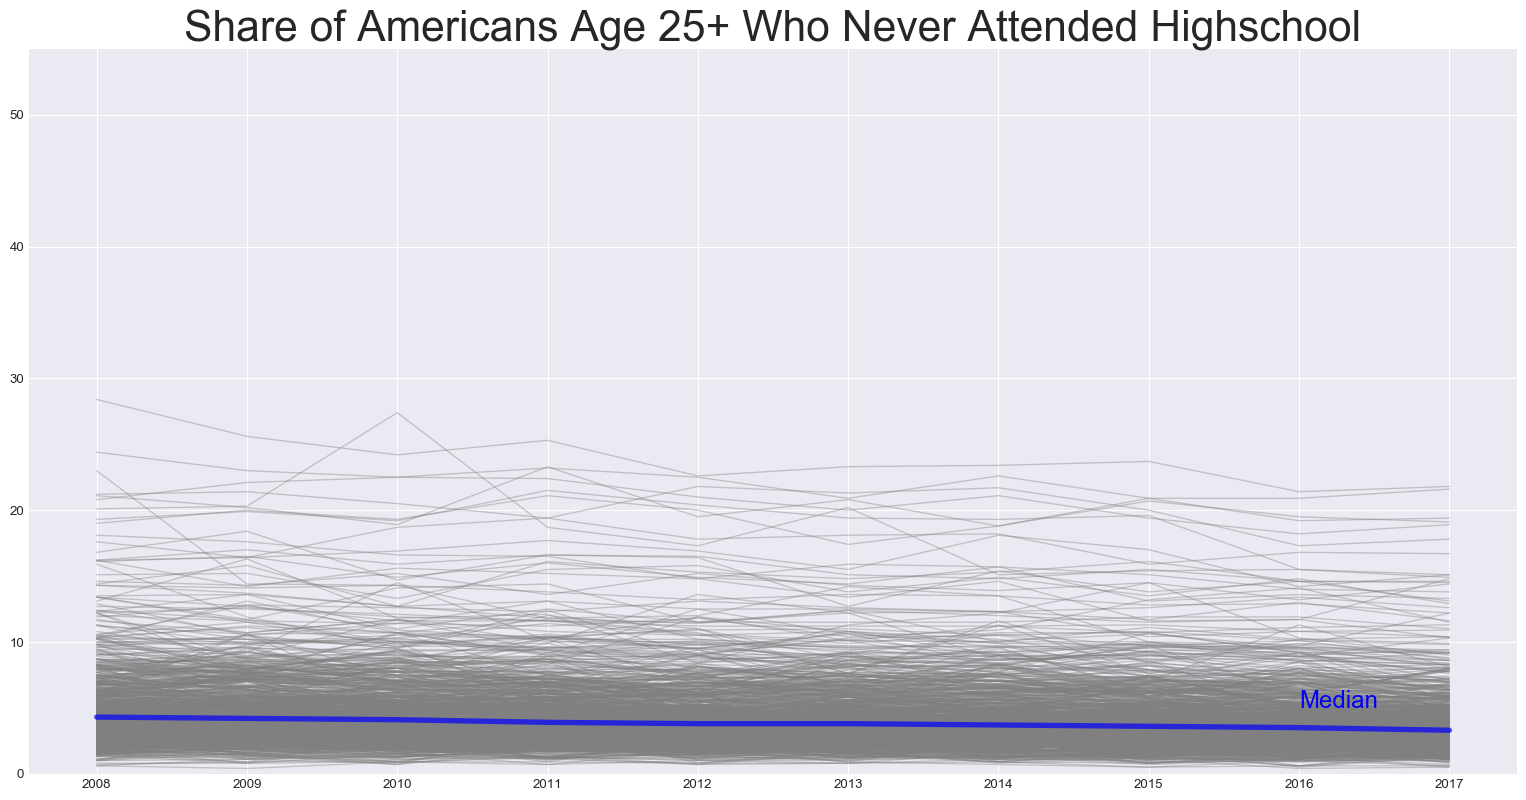

In [11]:
#Establish a style for graphs
##Less than high school education
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(1920/my_dpi, 960/my_dpi), dpi=my_dpi)

# multiple line plot
##Less than high school education
for column in lessThanHighschoolTrendCleanT.drop('year', axis=1):
    plt.plot(lessThanHighschoolTrendCleanT['year'], lessThanHighschoolTrendCleanT[column], marker='', color='grey', linewidth=1, alpha=0.4)

# highlight the mean
##Less than high school education
plt.plot(lessThanHighschoolTrendCleanT['year'], lessThanHighschoolTrendCleanT['Median'], marker='', color='blue', linewidth = 4, alpha = 0.7)    

# Add chart titles and mean label
## Less than a high school education
plt.title("Share of Americans Age 25+ Who Never Attended Highschool", size=32)
plt.text(8, 5, "Median", size=18, color='blue')
plt.ylim(0, 55)

plt.show()

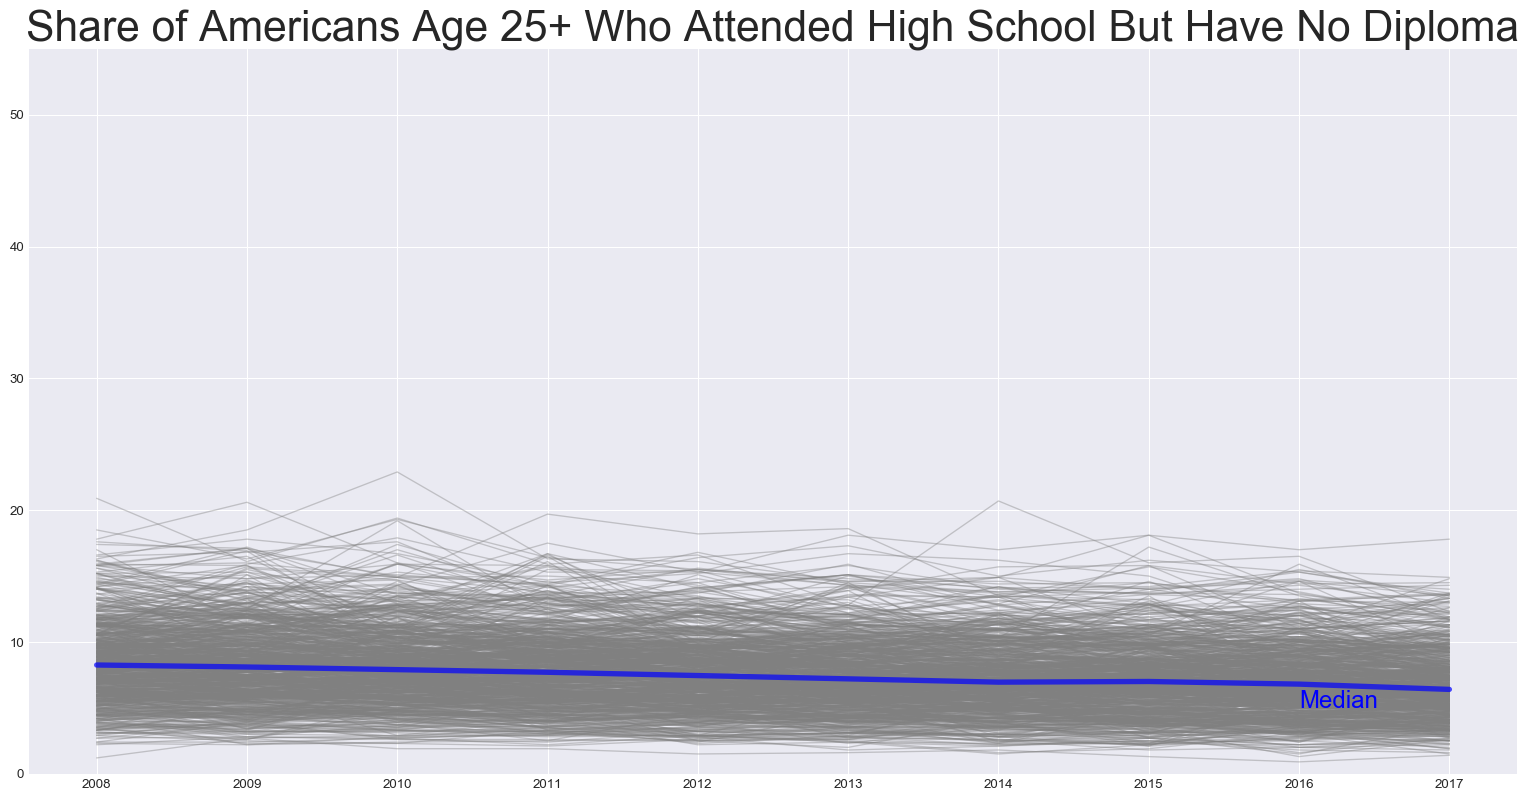

In [12]:
##High school education no diploma
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(1920/my_dpi, 960/my_dpi), dpi=my_dpi)

# multiple line plot
##High school education do diploma
for column in noDiplomaTrendCleanT.drop('year', axis=1):
    plt.plot(noDiplomaTrendCleanT['year'], noDiplomaTrendCleanT[column], marker='', color='grey', linewidth=1, alpha=0.4)    

# highlight the mean
##High school education no diploma
plt.plot(noDiplomaTrendCleanT['year'], noDiplomaTrendCleanT['Median'], marker='', color='blue', linewidth = 4, alpha = 0.7)

# Add chart titles and mean label
## High school education no dipoloma
plt.title("Share of Americans Age 25+ Who Attended High School But Have No Diploma", size=32)
plt.text(8, 5, "Median", size=18, color='blue')
plt.ylim(0, 55)

plt.show()

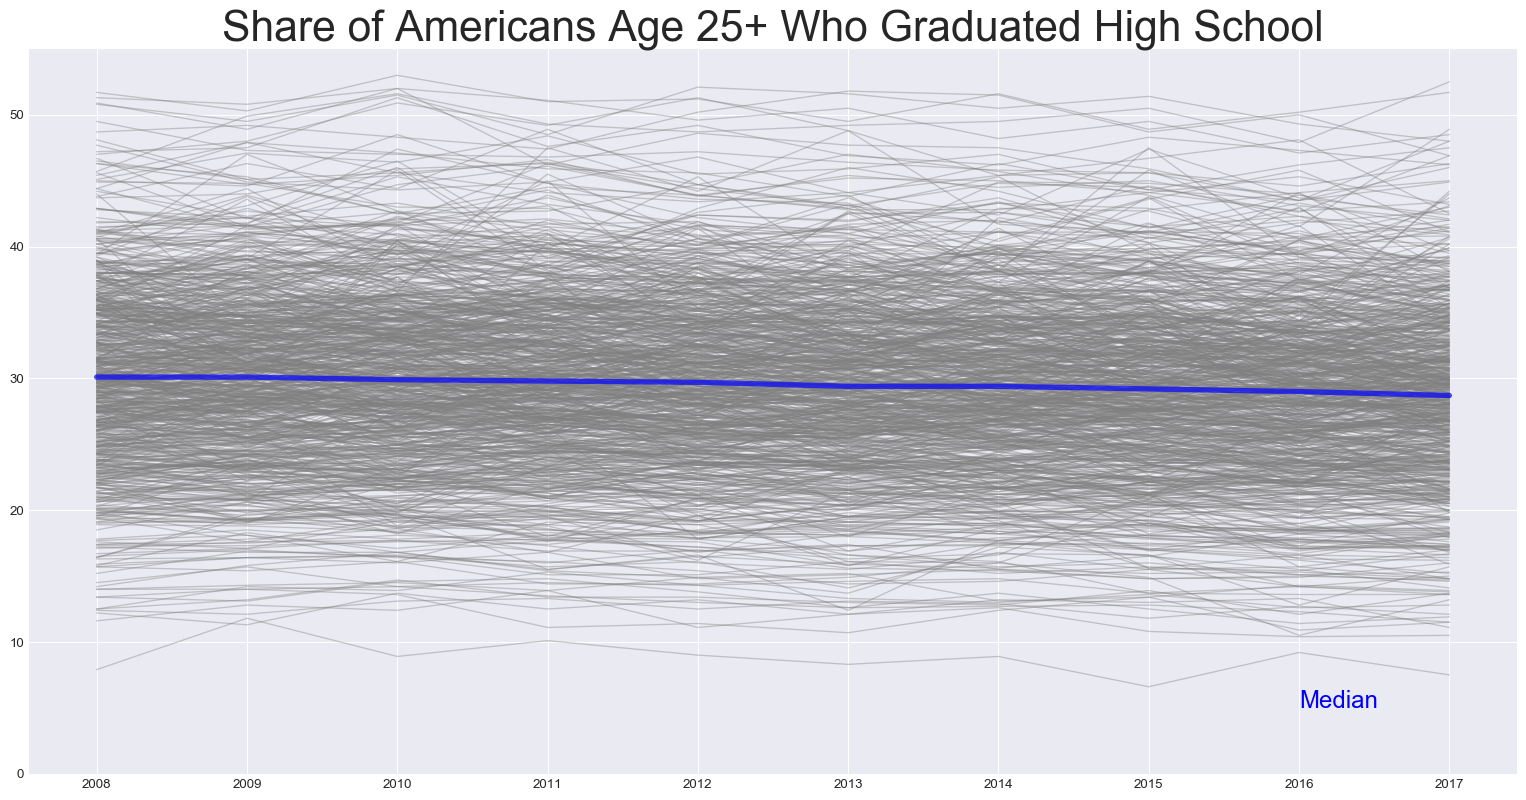

In [13]:
#Establish a style for graphs
##High school graduate
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(1920/my_dpi, 960/my_dpi), dpi=my_dpi)

# multiple line plot
##High school graduate
for column in hsGradTrendCleanT.drop('year', axis=1):
    plt.plot(hsGradTrendCleanT['year'], hsGradTrendCleanT[column], marker='', color='grey', linewidth=1, alpha=0.4)

# highlight the mean
##High school graduate
plt.plot(hsGradTrendCleanT['year'], hsGradTrendCleanT['Median'], marker='', color='blue', linewidth = 4, alpha = 0.7)    

# Add chart titles and mean label
##High school graduate
plt.title("Share of Americans Age 25+ Who Graduated High School", size=32)
plt.text(8, 5, "Median", size=18, color='blue')
plt.ylim(0, 55)

plt.show()


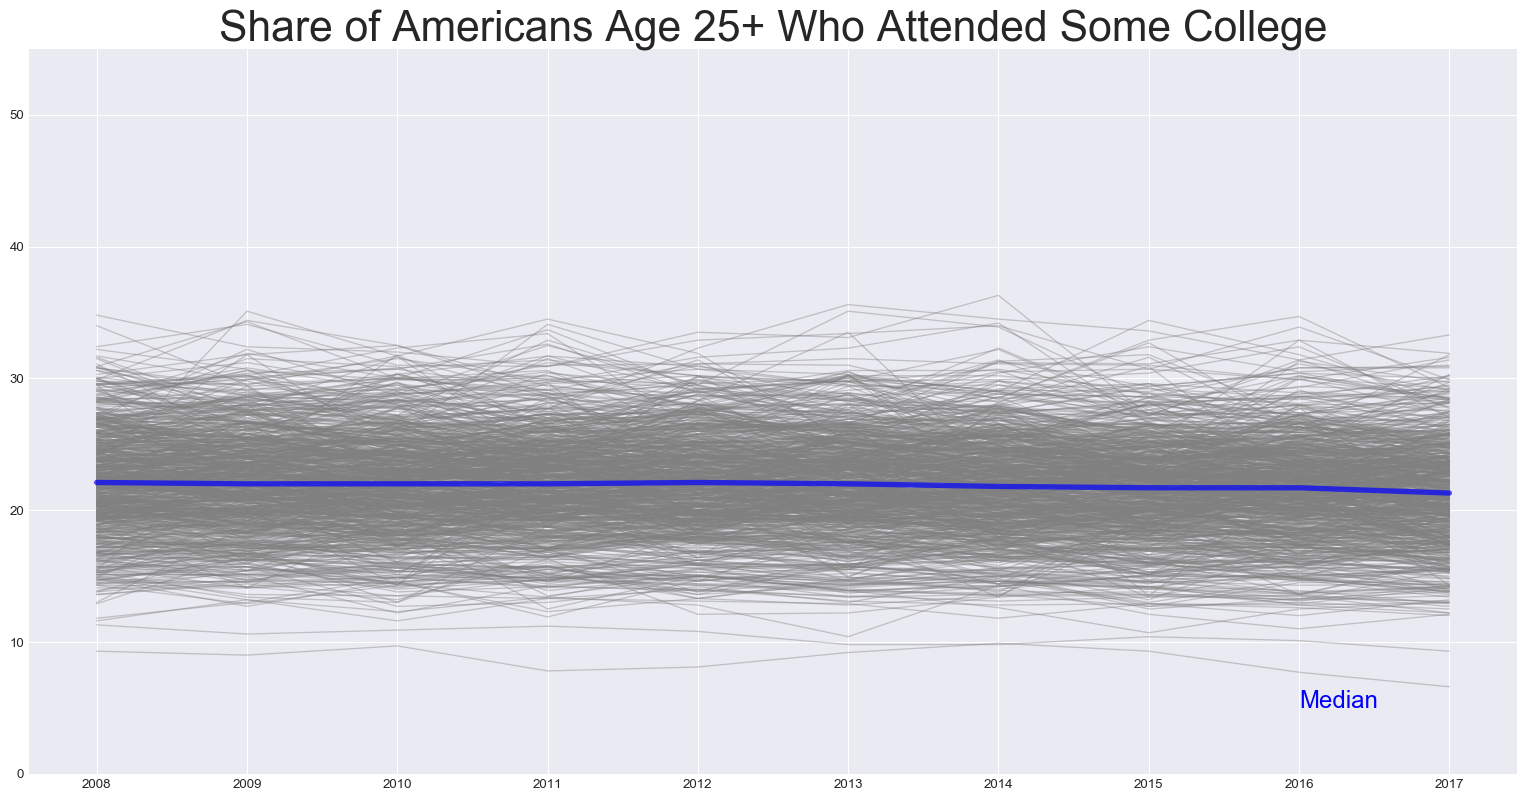

In [14]:
#Establish a style for graphs
## Some college
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(1920/my_dpi, 960/my_dpi), dpi=my_dpi)

# multiple line plot
## Some college
for column in someCollegeTrendCleanT.drop('year', axis=1):
    plt.plot(someCollegeTrendCleanT['year'], someCollegeTrendCleanT[column], marker='', color='grey', linewidth=1, alpha=0.4)

# highlight the mean
## Some college
plt.plot(someCollegeTrendCleanT['year'], someCollegeTrendCleanT['Median'], marker='', color='blue', linewidth = 4, alpha = 0.7)    

# Add chart titles and mean label
## Some college
plt.title("Share of Americans Age 25+ Who Attended Some College", size=32)
plt.text(8, 5, "Median", size=18, color='blue')
plt.ylim(0, 55)

plt.show()


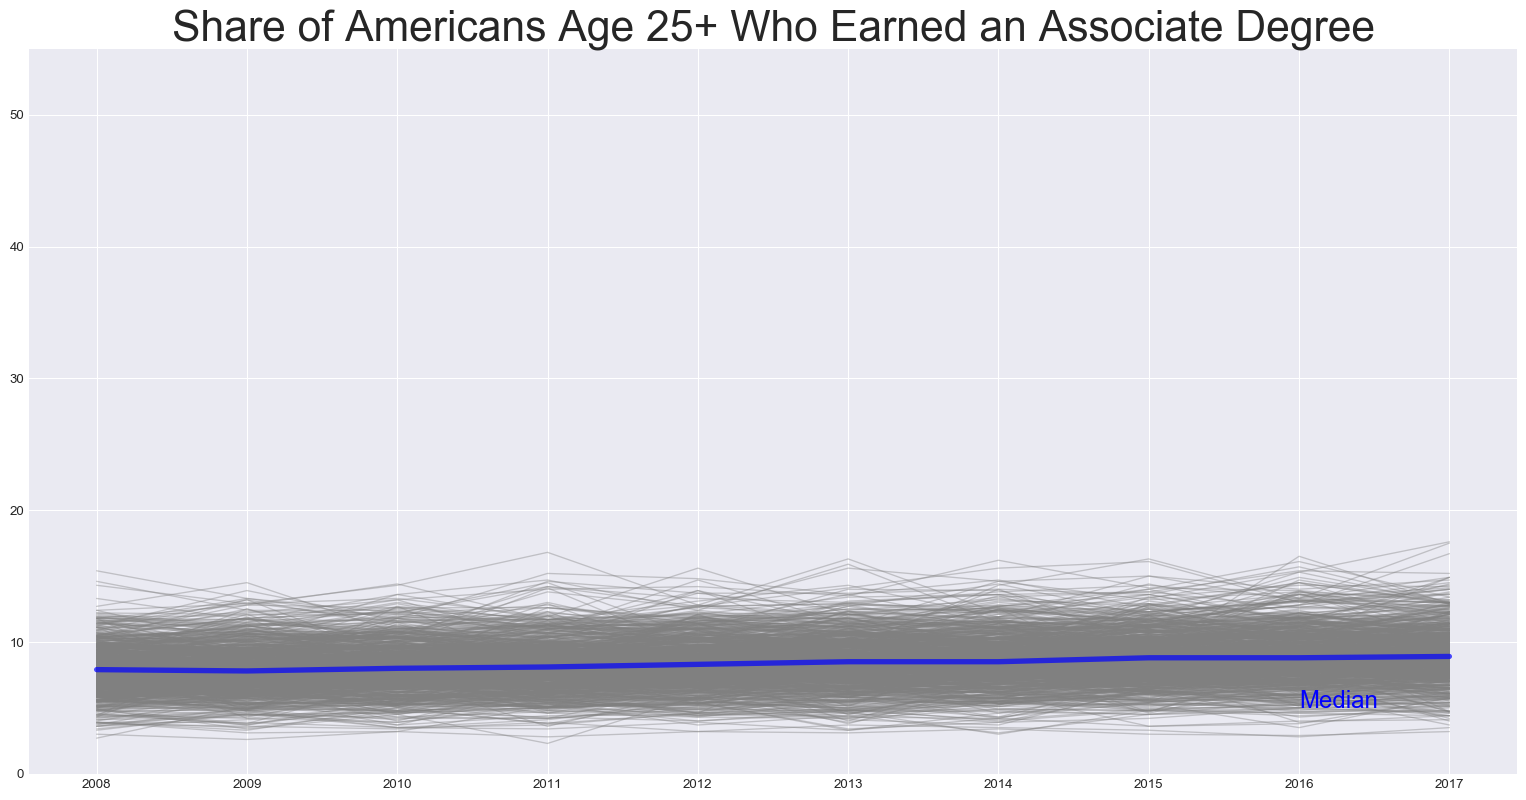

In [15]:
#Establish a style for graphs
## Associate degree
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(1920/my_dpi, 960/my_dpi), dpi=my_dpi)

# multiple line plot
## Associate degree
for column in associateTrendCleanT.drop('year', axis=1):
    plt.plot(associateTrendCleanT['year'], associateTrendCleanT[column], marker='', color='grey', linewidth=1, alpha=0.4)

# highlight the mean
## Associate degree
plt.plot(associateTrendCleanT['year'], associateTrendCleanT['Median'], marker='', color='blue', linewidth = 4, alpha = 0.7)    

# Add chart titles and mean label
## Associate degree
plt.title("Share of Americans Age 25+ Who Earned an Associate Degree", size=32)
plt.text(8, 5, "Median", size=18, color='blue')
plt.ylim(0, 55)

plt.show()

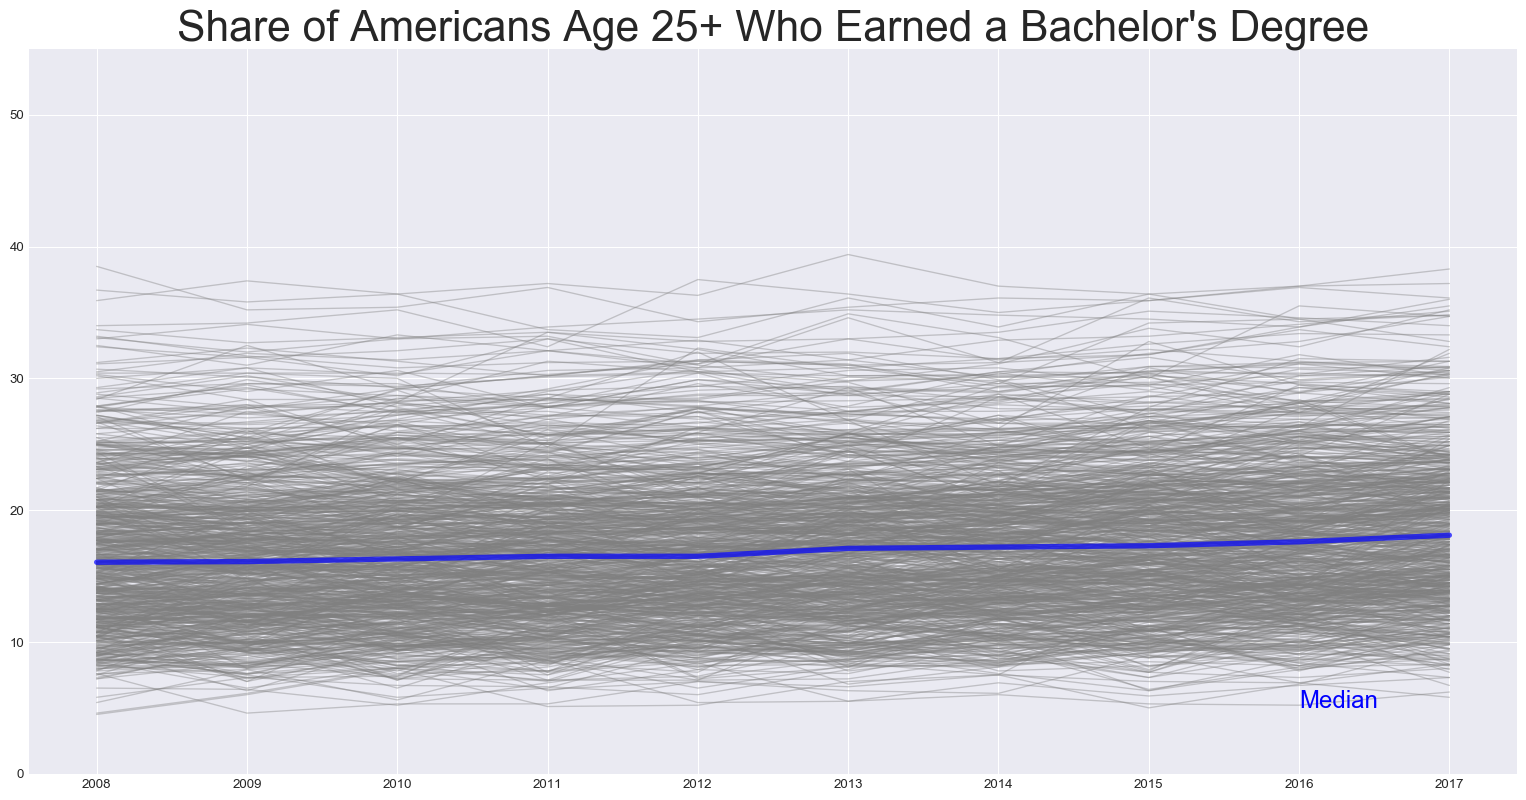

In [16]:
#Establish a style for graphs
## Bachelor degree
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(1920/my_dpi, 960/my_dpi), dpi=my_dpi)

# multiple line plot
## Bachelor degree
for column in bachelorTrendCleanT.drop('year', axis=1):
    plt.plot(bachelorTrendCleanT['year'], bachelorTrendCleanT[column], marker='', color='grey', linewidth=1, alpha=0.4)

# highlight the mean
## Bachelor degree
plt.plot(bachelorTrendCleanT['year'], bachelorTrendCleanT['Median'], marker='', color='blue', linewidth = 4, alpha = 0.7)    

# Add chart titles and mean label
## Bachelor degree
plt.title("Share of Americans Age 25+ Who Earned a Bachelor's Degree", size=32)
plt.text(8, 5, "Median", size=18, color='blue')
plt.ylim(0, 55)

plt.show()

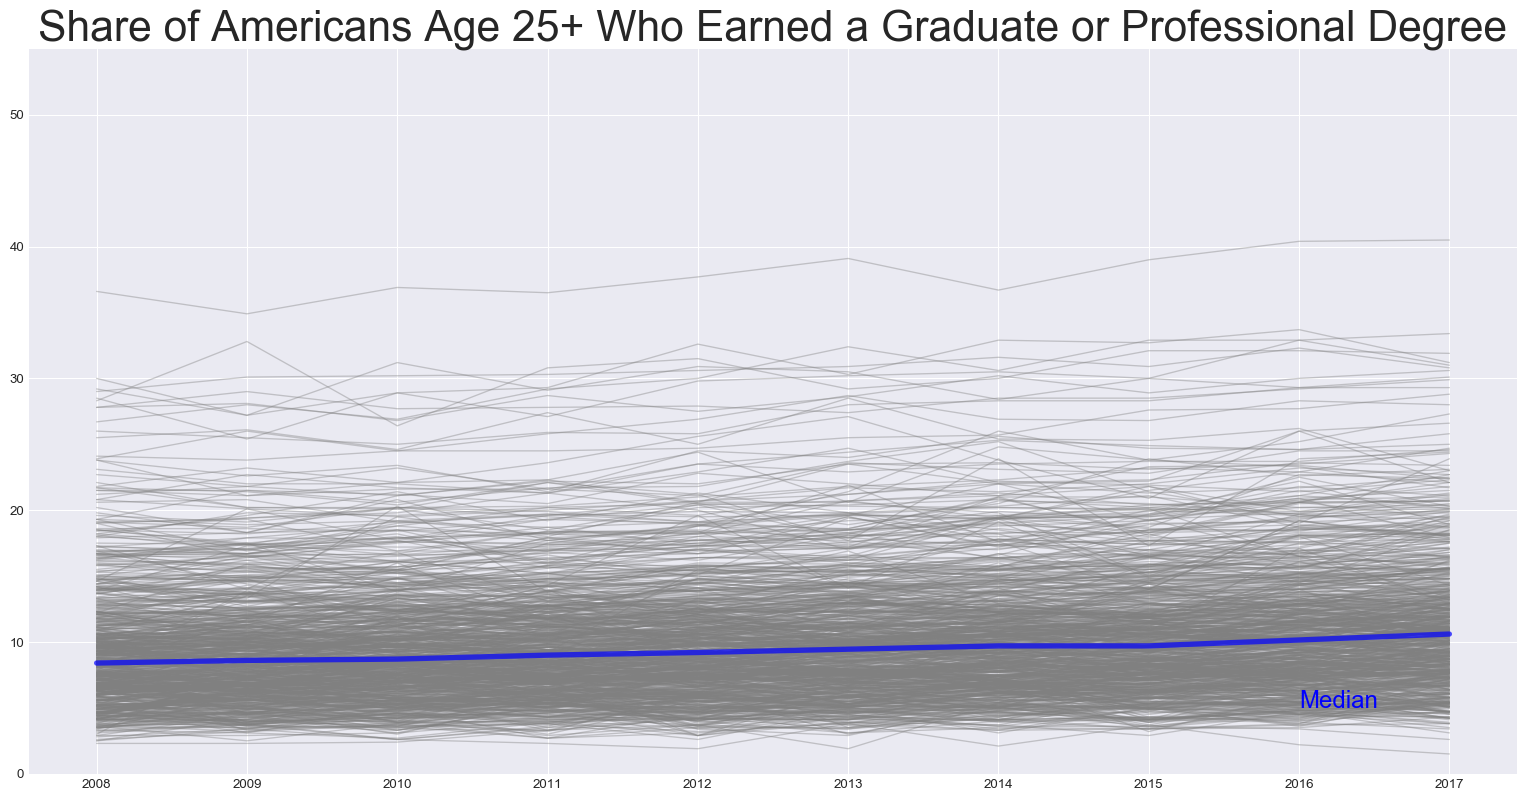

In [17]:
#Establish a style for graphs
## Graduate or Professional degree
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(1920/my_dpi, 960/my_dpi), dpi=my_dpi)

# multiple line plot
## Bachelor degree
for column in gradTrendCleanT.drop('year', axis=1):
    plt.plot(gradTrendCleanT['year'], gradTrendCleanT[column], marker='', color='grey', linewidth=1, alpha=0.4)

# highlight the mean
## Graduate or Professional degree
plt.plot(gradTrendCleanT['year'], gradTrendCleanT['Median'], marker='', color='blue', linewidth = 4, alpha = 0.7)    

# Add chart titles and mean label
## Graduate or Professional degree
plt.title("Share of Americans Age 25+ Who Earned a Graduate or Professional Degree", size=32)
plt.text(8, 5, "Median", size=18, color='blue')
plt.ylim(0, 55)

plt.show()

# Find the Percent Change

In [18]:
# Trended Percent Change for median population with less than a high school education
lessThanHighschoolPctChange = lessThanHighschoolTrendClean[-1:]
lessThanHighschoolPctChange

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median    NaN        4.3        4.2        4.1        3.9        3.8   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median        3.8        3.7        3.6        3.5        3.3

In [19]:
lessThanHighschoolPctChange.pct_change(axis='columns')

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median     NaN        NaN  -0.023256   -0.02381   -0.04878  -0.025641   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median        0.0  -0.026316  -0.027027  -0.027778  -0.057143

In [20]:
# Trended Percent Change for median population with a high school education but without a diploma
noDiplomaPctChange = noDiplomaTrendClean[-1:]
noDiplomaPctChange

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median    NaN       8.25        8.1        7.9        7.7       7.45   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median        7.2       6.95        7.0        6.8        6.4

In [21]:
noDiplomaPctChange.pct_change(axis='columns')

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median     NaN        NaN  -0.018182  -0.024691  -0.025316  -0.032468   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median  -0.033557  -0.034722   0.007194  -0.028571  -0.058824

In [22]:
# Trended Percent Change for median population with a high school diploma
hsGradPctChange = hsGradTrendClean[-1:]
hsGradPctChange

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median    NaN       30.1       30.1       29.9       29.8       29.7   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median       29.4       29.4       29.2       29.0       28.7

In [23]:
hsGradPctChange.pct_change(axis='columns')

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median     NaN        NaN        0.0  -0.006645  -0.003344  -0.003356   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median  -0.010101        0.0  -0.006803  -0.006849  -0.010345

In [24]:
# Trended Percent Change for median population with some college
someCollegePctChange = someCollegeTrendClean[-1:]
someCollegePctChange

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median    NaN       22.1       22.0       22.0       22.0       22.1   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median       22.0       21.8       21.7       21.7       21.3

In [25]:
someCollegePctChange.pct_change(axis='columns')

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median     NaN        NaN  -0.004525        0.0        0.0   0.004545   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median  -0.004525  -0.009091  -0.004587        0.0  -0.018433

In [26]:
# Trended Percent Change for median population with an Associate degree
associatePctChange = associateTrendClean[-1:]
associatePctChange

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median    NaN        7.9        7.8        8.0        8.1        8.3   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median        8.5        8.5        8.8        8.8        8.9

In [27]:
associatePctChange.pct_change(axis='columns')

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median     NaN        NaN  -0.012658   0.025641     0.0125   0.024691   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median   0.024096        0.0   0.035294        0.0   0.011364

In [28]:
# Trended Percent Change for median population with a Bachelor degree
bachelorPctChange = bachelorTrendClean[-1:]
bachelorPctChange

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median    NaN      16.05       16.1       16.3       16.5       16.5   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median       17.1       17.2       17.3       17.6       18.1

In [29]:
bachelorPctChange.pct_change(axis='columns')

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median     NaN        NaN   0.003115   0.012422    0.01227        0.0   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median   0.036364   0.005848   0.005814   0.017341   0.028409

In [30]:
# Trended Percent Change for median population with a Graduate or Professional degree
gradPctChange = gradTrendClean[-1:]
gradPctChange

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median    NaN        8.4        8.6        8.7        9.0        9.2   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median       9.45        9.7        9.7      10.15       10.6

In [31]:
gradPctChange.pct_change(axis='columns')

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median     NaN        NaN    0.02381   0.011628   0.034483   0.022222   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median   0.027174   0.026455        0.0   0.046392   0.044335

# Linear Regression

Can population change predict a changes in education attainment?

In [32]:
# Build population tables

### Total population 25+
totalPop08 = raw2008[['GEO.display-label', 'HC01_EST_VC06']]
totalPop09 = raw2009[['GEO.display-label', 'HC01_EST_VC06']]
totalPop10 = raw2010[['GEO.display-label', 'HC01_EST_VC07']]
totalPop11 = raw2011[['GEO.display-label', 'HC01_EST_VC07']]
totalPop12 = raw2012[['GEO.display-label', 'HC01_EST_VC07']]
totalPop13 = raw2013[['GEO.display-label', 'HC01_EST_VC07']]
totalPop14 = raw2014[['GEO.display-label', 'HC01_EST_VC07']]
totalPop15 = raw2015[['GEO.display-label', 'HC01_EST_VC08']]
totalPop16 = raw2016[['GEO.display-label', 'HC01_EST_VC08']]
totalPop17 = raw2017[['GEO.display-label', 'HC01_EST_VC08']]

dfs = [totalPop08, totalPop09, totalPop10, totalPop11,
      totalPop12, totalPop13, totalPop14, totalPop15,
      totalPop16, totalPop17]

totalPopTrendClean = reduce(lambda left, right: pd.merge(left, right, on='GEO.display-label'), dfs)

totalPopTrendClean.columns = ['County', 'Pop2008',
                                  'Pop2009',
                                  'Pop2010',
                                  'Pop2011',
                                  'Pop2012',
                                  'Pop2013',
                                  'Pop2014',
                                  'Pop2015',
                                  'Pop2016',
                                  'Pop2017']

totalPopTrendClean = totalPopTrendClean.drop(totalPopTrendClean.index[0])


totalPopTrendClean[['Pop2008',
                             'Pop2009',
                             'Pop2010',
                             'Pop2011',
                             'Pop2012',
                             'Pop2013',
                             'Pop2014',
                             'Pop2015',
                             'Pop2016',
                             'Pop2017']] = totalPopTrendClean[['Pop2008', 'Pop2009', 'Pop2010',
                                                                          'Pop2011', 'Pop2012', 'Pop2013',
                                                                          'Pop2014', 'Pop2015', 'Pop2016',
                                                                          'Pop2017']].apply(pd.to_numeric)


totalPopTrendFinal = totalPopTrendClean.set_index('County')
totalPopTrendChange = totalPopTrendFinal.pct_change(axis='columns')
totalPopTrendChange

### Total population 25 to 34
youngestPop08 = raw2008[['GEO.display-label', 'HC01_EST_VC16']]
youngestPop09 = raw2009[['GEO.display-label', 'HC01_EST_VC16']]
youngestPop10 = raw2010[['GEO.display-label', 'HC01_EST_VC19']]
youngestPop11 = raw2011[['GEO.display-label', 'HC01_EST_VC19']]
youngestPop12 = raw2012[['GEO.display-label', 'HC01_EST_VC19']]
youngestPop13 = raw2013[['GEO.display-label', 'HC01_EST_VC19']]
youngestPop14 = raw2014[['GEO.display-label', 'HC01_EST_VC19']]
youngestPop15 = raw2015[['GEO.display-label', 'HC01_EST_VC20']]
youngestPop16 = raw2016[['GEO.display-label', 'HC01_EST_VC20']]
youngestPop17 = raw2017[['GEO.display-label', 'HC01_EST_VC20']]

dfs = [youngestPop08, youngestPop09, youngestPop10, youngestPop11,
      youngestPop12, youngestPop13, youngestPop14, youngestPop15,
      youngestPop16, youngestPop17]

youngestPopTrendClean = reduce(lambda left, right: pd.merge(left, right, on='GEO.display-label'), dfs)

youngestPopTrendClean.columns = ['County', 'Pop2008',
                                  'Pop2009',
                                  'Pop2010',
                                  'Pop2011',
                                  'Pop2012',
                                  'Pop2013',
                                  'Pop2014',
                                  'Pop2015',
                                  'Pop2016',
                                  'Pop2017']

youngestPopTrendClean = youngestPopTrendClean.drop(youngestPopTrendClean.index[0])


youngestPopTrendClean[['Pop2008',
                             'Pop2009',
                             'Pop2010',
                             'Pop2011',
                             'Pop2012',
                             'Pop2013',
                             'Pop2014',
                             'Pop2015',
                             'Pop2016',
                             'Pop2017']] = youngestPopTrendClean[['Pop2008', 'Pop2009', 'Pop2010',
                                                                          'Pop2011', 'Pop2012', 'Pop2013',
                                                                          'Pop2014', 'Pop2015', 'Pop2016',
                                                                          'Pop2017']].apply(pd.to_numeric)


youngestPopTrendFinal = youngestPopTrendClean.set_index('County')
youngestPopTrendChange = youngestPopTrendFinal.pct_change(axis='columns')
#youngestPopTrendChange

### Total population 35 to 44
middlePop08 = raw2008[['GEO.display-label', 'HC01_EST_VC19']]
middlePop09 = raw2009[['GEO.display-label', 'HC01_EST_VC19']]
middlePop10 = raw2010[['GEO.display-label', 'HC01_EST_VC23']]
middlePop11 = raw2011[['GEO.display-label', 'HC01_EST_VC23']]
middlePop12 = raw2012[['GEO.display-label', 'HC01_EST_VC23']]
middlePop13 = raw2013[['GEO.display-label', 'HC01_EST_VC23']]
middlePop14 = raw2014[['GEO.display-label', 'HC01_EST_VC23']]
middlePop15 = raw2015[['GEO.display-label', 'HC01_EST_VC24']]
middlePop16 = raw2016[['GEO.display-label', 'HC01_EST_VC24']]
middlePop17 = raw2017[['GEO.display-label', 'HC01_EST_VC24']]

dfs = [middlePop08, middlePop09, middlePop10, middlePop11,
      middlePop12, middlePop13, middlePop14, middlePop15,
      middlePop16, middlePop17]

middlePopTrendClean = reduce(lambda left, right: pd.merge(left, right, on='GEO.display-label'), dfs)

middlePopTrendClean.columns = ['County', 'Pop2008',
                                  'Pop2009',
                                  'Pop2010',
                                  'Pop2011',
                                  'Pop2012',
                                  'Pop2013',
                                  'Pop2014',
                                  'Pop2015',
                                  'Pop2016',
                                  'Pop2017']

middlePopTrendClean = middlePopTrendClean.drop(middlePopTrendClean.index[0])


middlePopTrendClean[['Pop2008',
                             'Pop2009',
                             'Pop2010',
                             'Pop2011',
                             'Pop2012',
                             'Pop2013',
                             'Pop2014',
                             'Pop2015',
                             'Pop2016',
                             'Pop2017']] = middlePopTrendClean[['Pop2008', 'Pop2009', 'Pop2010',
                                                                          'Pop2011', 'Pop2012', 'Pop2013',
                                                                          'Pop2014', 'Pop2015', 'Pop2016',
                                                                          'Pop2017']].apply(pd.to_numeric)


middlePopTrendFinal = middlePopTrendClean.set_index('County')
middlePopTrendChange = middlePopTrendFinal.pct_change(axis='columns')
#middlePopTrendChange

### Total population 45 to 64
oldestPop08 = raw2008[['GEO.display-label', 'HC01_EST_VC22']]
oldestPop09 = raw2009[['GEO.display-label', 'HC01_EST_VC22']]
oldestPop10 = raw2010[['GEO.display-label', 'HC01_EST_VC27']]
oldestPop11 = raw2011[['GEO.display-label', 'HC01_EST_VC27']]
oldestPop12 = raw2012[['GEO.display-label', 'HC01_EST_VC27']]
oldestPop13 = raw2013[['GEO.display-label', 'HC01_EST_VC27']]
oldestPop14 = raw2014[['GEO.display-label', 'HC01_EST_VC27']]
oldestPop15 = raw2015[['GEO.display-label', 'HC01_EST_VC28']]
oldestPop16 = raw2016[['GEO.display-label', 'HC01_EST_VC28']]
oldestPop17 = raw2017[['GEO.display-label', 'HC01_EST_VC28']]

dfs = [oldestPop08, oldestPop09, oldestPop10, oldestPop11,
      oldestPop12, oldestPop13, oldestPop14, oldestPop15,
      oldestPop16, oldestPop17]

oldestPopTrendClean = reduce(lambda left, right: pd.merge(left, right, on='GEO.display-label'), dfs)

oldestPopTrendClean.columns = ['County', 'Pop2008',
                                  'Pop2009',
                                  'Pop2010',
                                  'Pop2011',
                                  'Pop2012',
                                  'Pop2013',
                                  'Pop2014',
                                  'Pop2015',
                                  'Pop2016',
                                  'Pop2017']

oldestPopTrendClean = oldestPopTrendClean.drop(oldestPopTrendClean.index[0])


oldestPopTrendClean[['Pop2008',
                             'Pop2009',
                             'Pop2010',
                             'Pop2011',
                             'Pop2012',
                             'Pop2013',
                             'Pop2014',
                             'Pop2015',
                             'Pop2016',
                             'Pop2017']] = oldestPopTrendClean[['Pop2008', 'Pop2009', 'Pop2010',
                                                                          'Pop2011', 'Pop2012', 'Pop2013',
                                                                          'Pop2014', 'Pop2015', 'Pop2016',
                                                                          'Pop2017']].apply(pd.to_numeric)


oldestPopTrendFinal = oldestPopTrendClean.set_index('County')
oldestPopTrendChange = oldestPopTrendFinal.pct_change(axis='columns')
#oldestPopTrendChange

### Total population 65 plus
oowfPop08 = raw2008[['GEO.display-label', 'HC01_EST_VC32']]
oowfPop09 = raw2009[['GEO.display-label', 'HC01_EST_VC22']]
oowfPop10 = raw2010[['GEO.display-label', 'HC01_EST_VC27']]
oowfPop11 = raw2011[['GEO.display-label', 'HC01_EST_VC27']]
oowfPop12 = raw2012[['GEO.display-label', 'HC01_EST_VC27']]
oowfPop13 = raw2013[['GEO.display-label', 'HC01_EST_VC27']]
oowfPop14 = raw2014[['GEO.display-label', 'HC01_EST_VC27']]
oowfPop15 = raw2015[['GEO.display-label', 'HC01_EST_VC28']]
oowfPop16 = raw2016[['GEO.display-label', 'HC01_EST_VC28']]
oowfPop17 = raw2017[['GEO.display-label', 'HC01_EST_VC28']]

dfs = [oowfPop08, oowfPop09, oowfPop10, oowfPop11,
      oowfPop12, oowfPop13, oowfPop14, oowfPop15,
      oowfPop16, oowfPop17]

oowfPopTrendClean = reduce(lambda left, right: pd.merge(left, right, on='GEO.display-label'), dfs)

oowfPopTrendClean.columns = ['County', 'Pop2008',
                                  'Pop2009',
                                  'Pop2010',
                                  'Pop2011',
                                  'Pop2012',
                                  'Pop2013',
                                  'Pop2014',
                                  'Pop2015',
                                  'Pop2016',
                                  'Pop2017']

oowfPopTrendClean = oowfPopTrendClean.drop(oowfPopTrendClean.index[0])


oowfPopTrendClean[['Pop2008',
                             'Pop2009',
                             'Pop2010',
                             'Pop2011',
                             'Pop2012',
                             'Pop2013',
                             'Pop2014',
                             'Pop2015',
                             'Pop2016',
                             'Pop2017']] = oowfPopTrendClean[['Pop2008', 'Pop2009', 'Pop2010',
                                                                          'Pop2011', 'Pop2012', 'Pop2013',
                                                                          'Pop2014', 'Pop2015', 'Pop2016',
                                                                          'Pop2017']].apply(pd.to_numeric)


oowfPopTrendFinal = oldestPopTrendClean.set_index('County')
oowfPopTrendChange = oldestPopTrendFinal.pct_change(axis='columns')
#oowfPopTrendChange

In [33]:
youngestPopTrendChange.describe()

Pop2008     Pop2009     Pop2010     Pop2011     Pop2012     Pop2013  \
count      0.0  788.000000  788.000000  788.000000  788.000000  788.000000   
mean       NaN   -0.028378    0.014826    0.010970    0.012939    0.012037   
std        NaN    0.152016    0.112074    0.057797    0.056458    0.050874   
min        NaN   -0.435566   -0.343008   -0.235750   -0.274151   -0.191131   
25%        NaN   -0.130288   -0.051495   -0.015880   -0.012067   -0.012993   
50%        NaN   -0.039794   -0.008399    0.011829    0.014257    0.011111   
75%        NaN    0.063229    0.059662    0.037545    0.034383    0.034642   
max        NaN    0.718126    0.471709    0.415261    0.457190    0.307057   

          Pop2014     Pop2015     Pop2016     Pop2017  
count  788.000000  788.000000  788.000000  788.000000  
mean     0.016964    0.010883    0.013222    0.012981  
std      0.052782    0.048697    0.052395    0.053089  
min     -0.193788   -0.199611   -0.262676   -0.196624  
25%     -0.008927   -0.014865   -0.011166   -0.014293  
50%      0.015751    0.010005    0.011682    0.014897  
75%      0.038449    0.033492    0.036644    0.035064  
max      0.343139    0.281501    0.217995    0.361920

In [34]:
raw2017.describe()

GEO.id GEO.id2   GEO.display-label HC01_EST_VC02  \
count              827     827                 827           827   
unique             827     827                 827           822   
top     0500000US12119   42021  Wayne County, Ohio         12483   
freq                 1       1                   1             2   

       HC01_MOE_VC02 HC02_EST_VC02 HC02_MOE_VC02 HC03_EST_VC02 HC03_MOE_VC02  \
count            827           827           827           827           827   
unique           578             2             2           811           544   
top              775           (X)           (X)          3698             4   
freq               5           826           826             2             6   

       HC04_EST_VC02      ...      HC02_EST_VC85 HC02_MOE_VC85 HC03_EST_VC85  \
count            827      ...                827           827           827   
unique             2      ...                  2             2           819   
top              (X)      ...                (X)           (X)         53670   
freq             826      ...                826           826             2   

       HC03_MOE_VC85 HC04_EST_VC85 HC04_MOE_VC85 HC05_EST_VC85 HC05_MOE_VC85  \
count            827           827           827           827           827   
unique           814             2             2           813           807   
top            10623           (X)           (X)         51036          8026   
freq               2           826           826             3             3   

       HC06_EST_VC85 HC06_MOE_VC85  
count            827           827  
unique             2             2  
top              (X)           (X)  
freq             826           826  

[4 rows x 771 columns]

## Can we predict the median individual income based on county population?

In [35]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [49]:
new_header = raw2017.iloc[0] # grab the first row for the new header
reg2017 = raw2017[1:] # take the data less the header row
reg2017.columns = new_header # set the header as the dataframe header
reg2017

0                Id    Id2                             Geography  \
1    0500000US01003  01003               Baldwin County, Alabama   
2    0500000US01015  01015               Calhoun County, Alabama   
3    0500000US01043  01043               Cullman County, Alabama   
4    0500000US01049  01049                DeKalb County, Alabama   
5    0500000US01051  01051                Elmore County, Alabama   
6    0500000US01055  01055                Etowah County, Alabama   
7    0500000US01069  01069               Houston County, Alabama   
8    0500000US01073  01073             Jefferson County, Alabama   
9    0500000US01077  01077            Lauderdale County, Alabama   
10   0500000US01081  01081                   Lee County, Alabama   
11   0500000US01083  01083             Limestone County, Alabama   
12   0500000US01089  01089               Madison County, Alabama   
13   0500000US01095  01095              Marshall County, Alabama   
14   0500000US01097  01097                Mobile County, Alabama   
15   0500000US01101  01101            Montgomery County, Alabama   
16   0500000US01103  01103                Morgan County, Alabama   
17   0500000US01115  01115             St. Clair County, Alabama   
18   0500000US01117  01117                Shelby County, Alabama   
19   0500000US01121  01121             Talladega County, Alabama   
20   0500000US01125  01125            Tuscaloosa County, Alabama   
21   0500000US01127  01127                Walker County, Alabama   
22   0500000US02020  02020        Anchorage Municipality, Alaska   
23   0500000US02090  02090  Fairbanks North Star Borough, Alaska   
24   0500000US02170  02170     Matanuska-Susitna Borough, Alaska   
25   0500000US04001  04001                Apache County, Arizona   
26   0500000US04003  04003               Cochise County, Arizona   
27   0500000US04005  04005              Coconino County, Arizona   
28   0500000US04013  04013              Maricopa County, Arizona   
29   0500000US04015  04015                Mohave County, Arizona   
30   0500000US04017  04017                Navajo County, Arizona   
..              ...    ...                                   ...   
797  0500000US54033  54033        Harrison County, West Virginia   
798  0500000US54039  54039         Kanawha County, West Virginia   
799  0500000US54061  54061      Monongalia County, West Virginia   
800  0500000US54081  54081         Raleigh County, West Virginia   
801  0500000US54107  54107            Wood County, West Virginia   
802  0500000US55009  55009               Brown County, Wisconsin   
803  0500000US55025  55025                Dane County, Wisconsin   
804  0500000US55027  55027               Dodge County, Wisconsin   
805  0500000US55035  55035          Eau Claire County, Wisconsin   
806  0500000US55039  55039         Fond du Lac County, Wisconsin   
807  0500000US55055  55055           Jefferson County, Wisconsin   
808  0500000US55059  55059             Kenosha County, Wisconsin   
809  0500000US55063  55063           La Crosse County, Wisconsin   
810  0500000US55071  55071           Manitowoc County, Wisconsin   
811  0500000US55073  55073            Marathon County, Wisconsin   
812  0500000US55079  55079           Milwaukee County, Wisconsin   
813  0500000US55087  55087           Outagamie County, Wisconsin   
814  0500000US55089  55089             Ozaukee County, Wisconsin   
815  0500000US55097  55097             Portage County, Wisconsin   
816  0500000US55101  55101              Racine County, Wisconsin   
817  0500000US55105  55105                Rock County, Wisconsin   
818  0500000US55109  55109           St. Croix County, Wisconsin   
819  0500000US55117  55117           Sheboygan County, Wisconsin   
820  0500000US55127  55127            Walworth County, Wisconsin   
821  0500000US55131  55131          Washington County, Wisconsin   
822  0500000US55133  55133            Waukesha County, Wisconsin   
823  0500000US55139  55139           Winnebago County, W

In [53]:
reg2017.dtypes

0
Id                                                                                                                                                                                               object
Id2                                                                                                                                                                                              object
Geography                                                                                                                                                                                        object
Total; Estimate; Population 18 to 24 years                                                                                                                                                       object
Total; Margin of Error; Population 18 to 24 years                                                                                                                                                objec

In [116]:
reg2017.describe()

0      Total; Estimate; Population 18 to 24 years  \
count                                  826.000000   
mean                                 32025.652542   
std                                  55412.054061   
min                                   3049.000000   
25%                                   9072.750000   
50%                                  15493.000000   
75%                                  35332.750000   
max                                 983483.000000   

0      Total; Margin of Error; Population 18 to 24 years  \
count                                         821.000000   
mean                                          701.845311   
std                                           328.260098   
min                                             3.000000   
25%                                           477.000000   
50%                                           666.000000   
75%                                           905.000000   
max                                          2217.000000   

0      Percent; Estimate; Population 18 to 24 years  \
count                                           0.0   
mean                                            NaN   
std                                             NaN   
min                                             NaN   
25%                                             NaN   
50%                                             NaN   
75%                                             NaN   
max                                             NaN   

0      Percent; Margin of Error; Population 18 to 24 years  \
count                                                0.0     
mean                                                 NaN     
std                                                  NaN     
min                                                  NaN     
25%                                                  NaN     
50%                                                  NaN     
75%                                                  NaN     
max                                                  NaN     

0      Male; Estimate; Population 18 to 24 years  \
count                                 826.000000   
mean                                16355.372881   
std                                 28148.336151   
min                                  1460.000000   
25%                                  4630.000000   
50%                                  8101.000000   
75%                                 17774.000000   
max                                496991.000000   

0      Male; Margin of Error; Population 18 to 24 years  \
count                                        820.000000   
mean                                         495.737805   
std                                          248.434770   
min                                            2.000000   
25%                                          319.750000   
50%                                          469.000000   
75%                                          651.250000   
max                                         1884.000000   

0      Percent Male; Estimate; Population 18 to 24 years  \
count                                                0.0   
mean                                                 NaN   
std                                                  NaN   
min                                                  NaN   
25%                                                  NaN   
50%                                                  NaN   
75%                                                  NaN   
max                                                  NaN   

0      Percent Male; Margin of Error; Population 18 to 24 years  \
count                                                0.0          
mean                                                 NaN          
std                                                  NaN          
min                                                  NaN          
25%                                              

In [64]:
cols = reg2017.columns.drop(['Id', 'Id2', 'Geography'])

reg2017[cols] = reg2017[cols].apply(pd.to_numeric, errors='coerce')
reg2017.dtypes

C:\Users\timsr\Anaconda3\lib\site-packages\pandas\core\frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


0
Id                                                                                                                                                                                                object
Id2                                                                                                                                                                                               object
Geography                                                                                                                                                                                         object
Total; Estimate; Population 18 to 24 years                                                                                                                                                         int64
Total; Margin of Error; Population 18 to 24 years                                                                                                                                                f

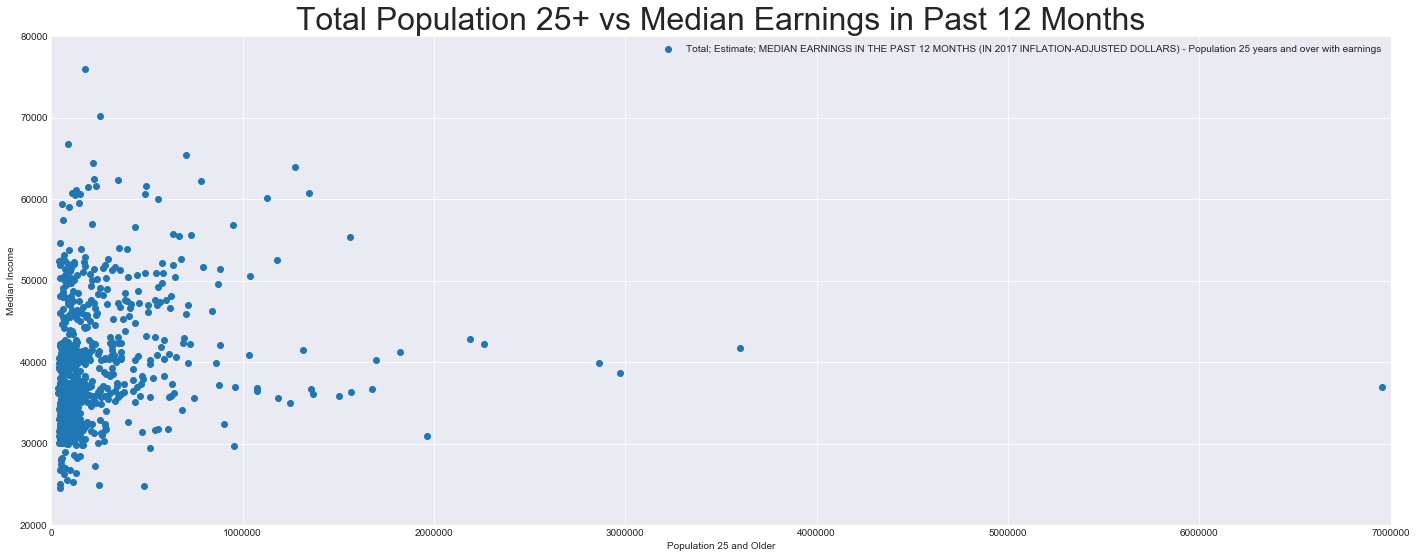

In [101]:
reg2017.plot(x='Total; Estimate; Population 25 years and over',
            y='Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings',
            style='o')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 24
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.title('Total Population 25+ vs Median Earnings in Past 12 Months', size=32)
plt.xlabel('Population 25 and Older')
plt.ylabel('Median Income')
plt.ylim(20000, 80000)
plt.xlim(0, 7000000)

plt.show()

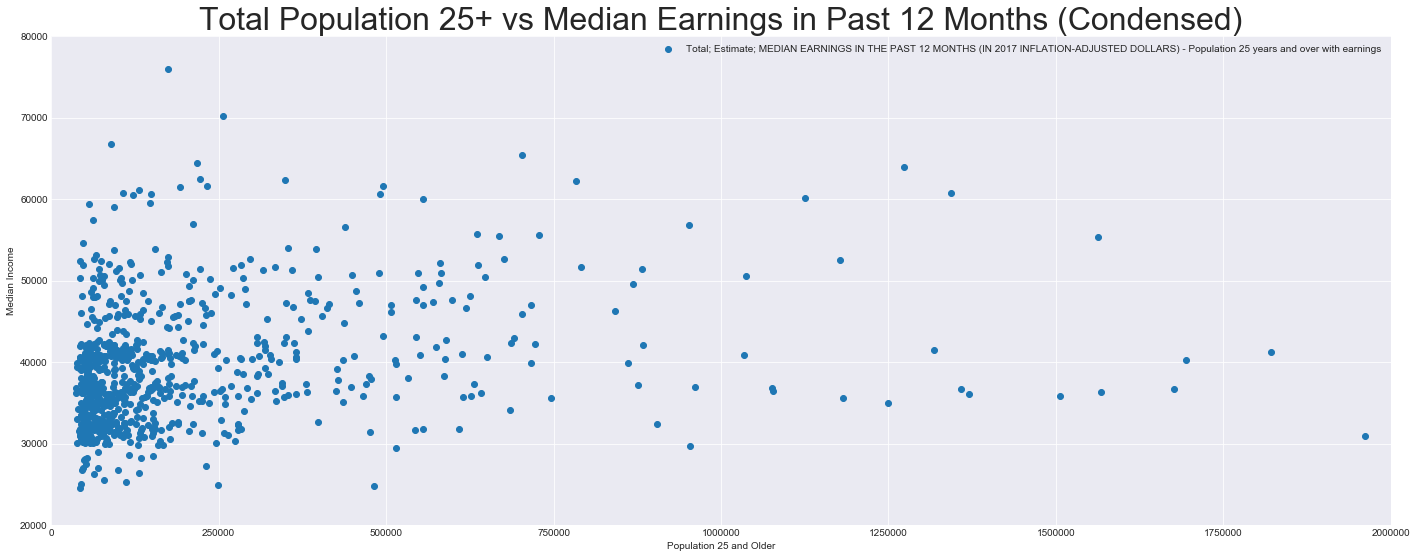

In [100]:
reg2017.plot(x='Total; Estimate; Population 25 years and over',
            y='Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings',
            style='o')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 24
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.title('Total Population 25+ vs Median Earnings in Past 12 Months (Condensed)', size=32)
plt.xlabel('Population 25 and Older')
plt.ylabel('Median Income')
plt.ylim(20000, 80000)
plt.xlim(0, 2000000)

plt.show()

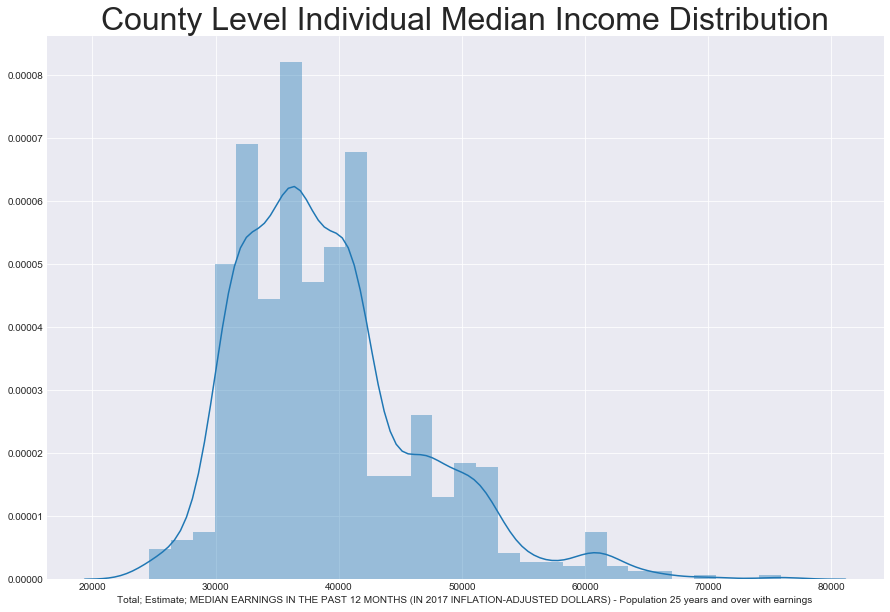

In [99]:
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.title('County Level Individual Median Income Distribution', size= 32)
seabornInstance.distplot(reg2017['Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings'])

In [118]:
X = reg2017['Total; Estimate; Population 25 years and over'].values.reshape(-1,1)
Y = reg2017['Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings'].values#.reshape(-1,1)

In [119]:
#Split the data, 80% for training, 20% for testing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [120]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
print(regressor.intercept_)

print(regressor.coef_)

37880.285337
[ 0.00526806]


In [122]:
Y_pred = regressor.predict(X_test)

In [123]:
regDF = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
regDF

Actual     Predicted
0     29530  40591.908834
1     39934  52970.518116
2     32391  38217.046102
3     36719  39225.205370
4     36362  38247.458616
5     49042  39207.357182
6     66767  38346.097780
7     35245  39038.784515
8     32345  38284.840773
9     52220  40938.162644
10    45367  38305.891942
11    34319  38563.584388
12    39130  38135.633496
13    32388  38390.960583
14    31860  38673.349696
15    37480  38132.862496
16    41938  39558.536629
17    45619  38335.319328
18    35203  39645.485967
19    40412  40976.909229
20    42132  38376.362787
21    51242  38388.579419
22    35731  39709.097797
23    39027  38115.556918
24    32377  38244.429481
25    40206  38240.441559
26    36472  39640.929094
27    45595  38198.844954
28    53705  38376.520829
29    38121  40688.388093
..      ...           ...
136   33550  38296.799270
137   34780  38222.809361
138   33173  38599.396663
139   42178  49800.536482
140   33070  38680.540599
141   33225  38431.092667
142   30550  38190.310696
143   75904  38795.199935
144   50344  38109.693566
145   61576  39108.127995
146   52358  38270.127080
147   33388  38185.390327
148   40135  38301.645886
149   42245  38218.263024
150   32480  38273.935887
151   29796  38759.350783
152   41865  38206.114877
153   58989  38369.830392
154   35833  39077.394130
155   60774  38447.781883
156   50848  38939.212904
157   34760  38171.087543
158   50487  39982.151907
159   31547  38965.321411
160   30663  38307.635670
161   35120  38194.778011
162   44314  38876.006714
163   31786  41086.073978
164   30487  38136.444777
165   38874  38569.937669

[166 rows x 2 columns]

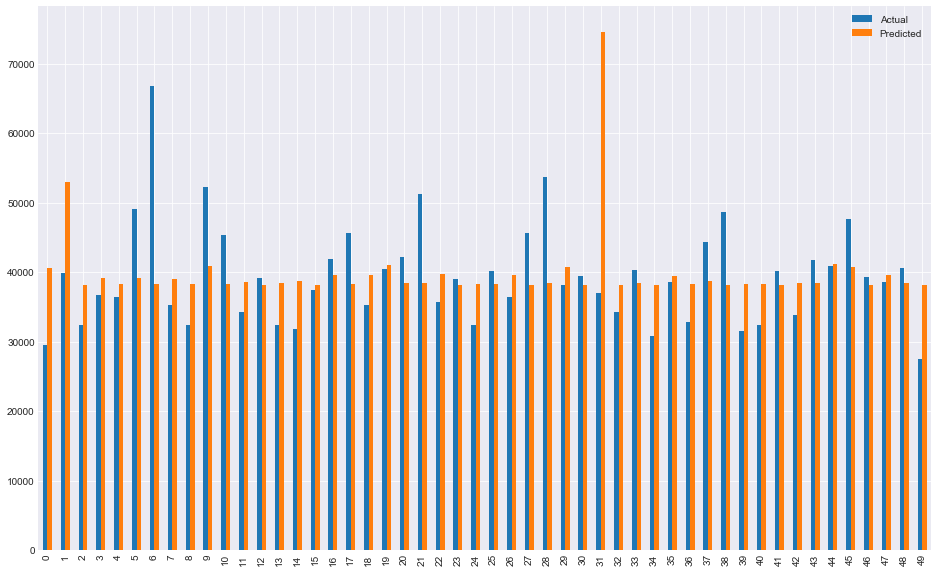

In [124]:
samplePred = regDF.head(50)
samplePred.plot(kind='bar', figsize=(16, 10))
plt.show()


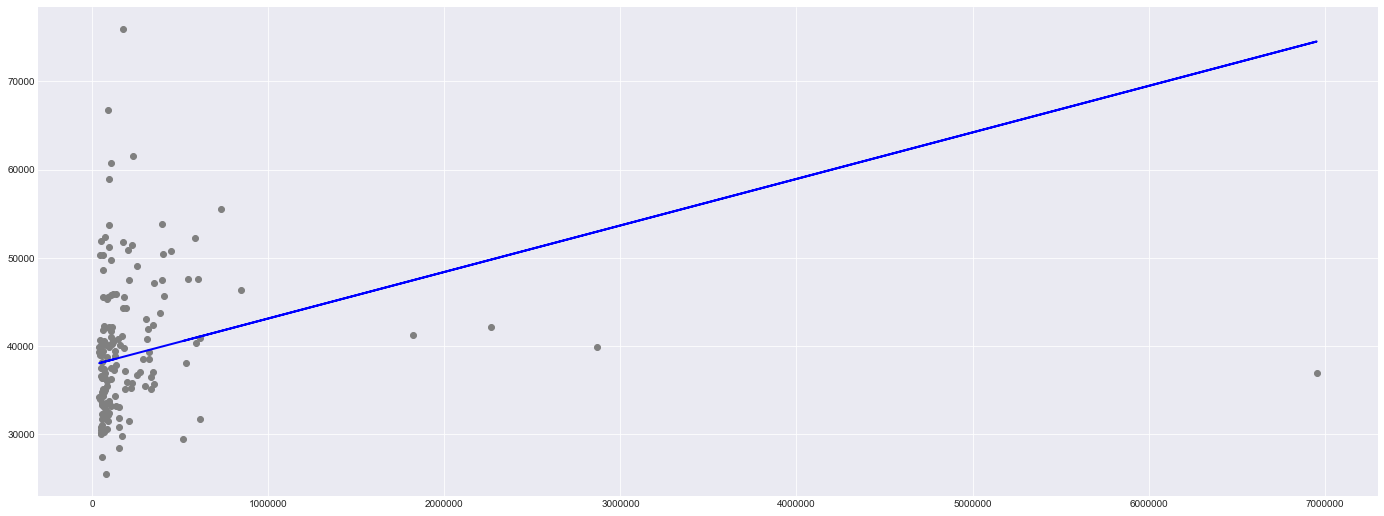

In [125]:
plt.scatter(X_test, Y_test, color='gray')
plt.plot(X_test, y_pred, color ='blue', linewidth = 2)
plt.show()

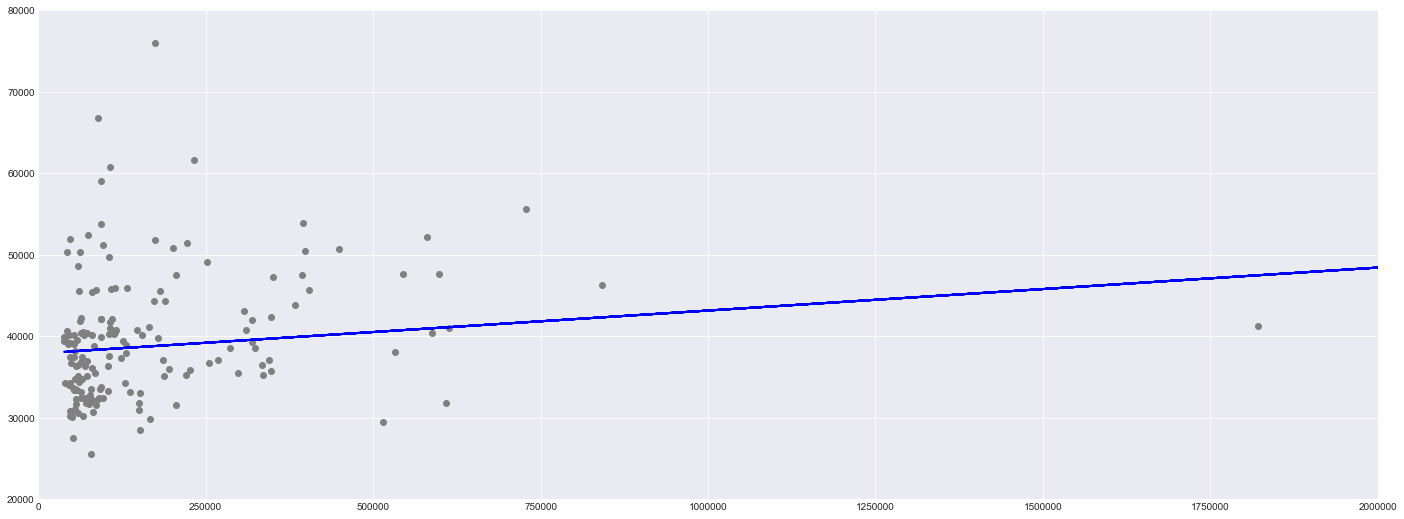

In [126]:
plt.scatter(X_test, Y_test, color='gray')
plt.plot(X_test, y_pred, color ='blue', linewidth = 2)
plt.ylim(20000, 80000)
plt.xlim(0, 2000000)
plt.show()

In [132]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squard Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('Mean Income Across All Counties', reg2017.loc[:, "Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings"].mean())

Mean Absolute Error: 5895.09334529
Mean Squard Error: 67784555.146
Root Mean Squared Error: 8233.13762462
Mean Income Across All Counties 39176.49031476997


The value of root mean squared error is $8,233 which is about 21 percent of the mean value of all individual incomes in the dataset. This means our algorithm was not very accurate.

## Using a mulitlinear regression, can find the attribute(s) most predictive of individual median income at a county level?

In [144]:
reg2017v2 = reg2017[["Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings",
                    'Total; Estimate; Population 25 years and over',
                    'Male; Estimate; Population 25 years and over',
                    'Female; Estimate; Population 25 years and over',
                    'Total; Estimate; Population 25 years and over - Less than 9th grade',
                    'Total; Estimate; Population 25 years and over - 9th to 12th grade, no diploma',
                    'Total; Estimate; Population 25 years and over - High school graduate (includes equivalency)',
                    'Total; Estimate; Population 25 years and over - Some college, no degree',
                    "Total; Estimate; Population 25 years and over - Associate's degree",
                    "Total; Estimate; Population 25 years and over - Bachelor's degree",
                    "Total; Estimate; Population 25 years and over - Graduate or professional degree",
                    "Total; Estimate; Population 25 to 34 years",
                    "Total; Estimate; Population 35 to 44 years",
                    "Total; Estimate; Population 45 to 64 years",
                    "Total; Estimate; Population 65 years and over"]]
reg2017v2

0    Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings  \
1                                                36780                                                                                          
2                                                32123                                                                                          
3                                                33388                                                                                          
4                                                33075                                                                                          
5                                                42300                                                                                          
6                                                31866                                                                                          
7                                                32061                                                                                          
8                                                36903                                                                                          
9                                                32391                                                                                          
10                                               35529                                                                                          
11                                               34780                                                                                          
12                                               41339                                                                                          
13                                               32482                                                                                          
14                                               35815                                                                                          
15                                               31860                                                                                          
16                                               31711                                                                                          
17                                               37401                                                                                          
18                                               47478                                                                                          
19                                               31712                                                                                          
20                                               40004                                                                                          
21                                               32469                                                                                          
22                                               47168                                                                                          
23                                               48055                                                                                          
24                                               42430                                                                                          
25                                               30616                                                                                          
26                                               31985                                                                                          
27                                               35516                               

In [145]:
reg2017v2.describe()

0      Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings  \
count                                         826.000000                                                                                          
mean                                        39176.490315                                                                                          
std                                          7465.874230                                                                                          
min                                         24623.000000                                                                                          
25%                                         33581.000000                                                                                          
50%                                         37416.500000                                                                                          
75%                                         42127.750000                                                                                          
max                                         75904.000000                                                                                          

0      Total; Estimate; Population 25 years and over  \
count                                   8.260000e+02   
mean                                    2.271654e+05   
std                                     4.019393e+05   
min                                     3.660000e+04   
25%                                     6.415675e+04   
50%                                     1.072755e+05   
75%                                     2.252680e+05   
max                                     6.955119e+06   

0      Male; Estimate; Population 25 years and over  \
count                                  8.260000e+02   
mean                                   1.093758e+05   
std                                    1.941022e+05   
min                                    1.726500e+04   
25%                                    3.091825e+04   
50%                                    5.172900e+04   
75%                                    1.086572e+05   
max                                    3.374711e+06   

0      Female; Estimate; Population 25 years and over  \
count                                    8.260000e+02   
mean                                     1.177897e+05   
std                                      2.079208e+05   
min                                      1.644800e+04   
25%                                      3.319775e+04   
50%                                      5.545950e+04   
75%                                      1.158782e+05   
max                                      3.580408e+06   

0      Total; Estimate; Population 25 years and over - Less than 9th grade  \
count                                         826.000000                     
mean                                        11654.974576                     
std                                         38303.073056                     
min                                           251.000000                     
25%                                          2069.500000                     
50%                                          3557.500000                     
75%                                          7883.250000                     
max                                        848662.000000                     

0      Total; Estimate; Population 25 years and over - 9th to 12th grade, no diploma  \
count                                         826.000000                               
mean                                        14932.382567                               
std                                         31026.724547                               
min                                           827.000000                               
25%               

In [146]:
reg2017v2['Percent Male'] = reg2017v2['Male; Estimate; Population 25 years and over']/reg2017v2['Total; Estimate; Population 25 years and over']
reg2017v2['Percent Female'] = reg2017v2['Female; Estimate; Population 25 years and over']/reg2017v2['Total; Estimate; Population 25 years and over']                                  
reg2017v2['Percent Less Than 9th Grade'] = reg2017v2['Total; Estimate; Population 25 years and over - Less than 9th grade']/reg2017v2['Total; Estimate; Population 25 years and over']
reg2017v2['Percent 9th to 12 Grade'] = reg2017v2['Total; Estimate; Population 25 years and over - 9th to 12th grade, no diploma']/reg2017v2['Total; Estimate; Population 25 years and over']
reg2017v2['Percent High School Graduate'] = reg2017v2['Total; Estimate; Population 25 years and over - High school graduate (includes equivalency)']/reg2017v2['Total; Estimate; Population 25 years and over']
reg2017v2['Percent Some College'] = reg2017v2['Total; Estimate; Population 25 years and over - Some college, no degree']/reg2017v2['Total; Estimate; Population 25 years and over']
reg2017v2['Percent Associates'] = reg2017v2["Total; Estimate; Population 25 years and over - Associate's degree"]/reg2017v2['Total; Estimate; Population 25 years and over']
reg2017v2['Percent Bachelors'] = reg2017v2["Total; Estimate; Population 25 years and over - Bachelor's degree"]/reg2017v2['Total; Estimate; Population 25 years and over']
reg2017v2['Percent Graduate or Professional'] = reg2017v2['Total; Estimate; Population 25 years and over - Graduate or professional degree']/reg2017v2['Total; Estimate; Population 25 years and over']
reg2017v2['Percent Age 25 to 34'] = reg2017v2['Total; Estimate; Population 25 to 34 years']/reg2017v2['Total; Estimate; Population 25 years and over']
reg2017v2['Percent Age 35 to 44'] = reg2017v2['Total; Estimate; Population 35 to 44 years']/reg2017v2['Total; Estimate; Population 25 years and over']
reg2017v2['Percent Age 45 to 64'] = reg2017v2['Total; Estimate; Population 45 to 64 years']/reg2017v2['Total; Estimate; Population 25 years and over']
reg2017v2['Percent Age 65 and older'] = reg2017v2['Total; Estimate; Population 65 years and over']/reg2017v2['Total; Estimate; Population 25 years and over']

reg2017v2                                   

C:\Users\timsr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\timsr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\timsr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

0    Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings  \
1                                                36780                                                                                          
2                                                32123                                                                                          
3                                                33388                                                                                          
4                                                33075                                                                                          
5                                                42300                                                                                          
6                                                31866                                                                                          
7                                                32061                                                                                          
8                                                36903                                                                                          
9                                                32391                                                                                          
10                                               35529                                                                                          
11                                               34780                                                                                          
12                                               41339                                                                                          
13                                               32482                                                                                          
14                                               35815                                                                                          
15                                               31860                                                                                          
16                                               31711                                                                                          
17                                               37401                                                                                          
18                                               47478                                                                                          
19                                               31712                                                                                          
20                                               40004                                                                                          
21                                               32469                                                                                          
22                                               47168                                                                                          
23                                               48055                                                                                          
24                                               42430                                                                                          
25                                               30616                                                                                          
26                                               31985                                                                                          
27                                               35516                               

In [164]:
X2 = reg2017v2[['Percent Male',
            'Percent Female',
            'Percent Less Than 9th Grade',
            'Percent 9th to 12 Grade',
            'Percent High School Graduate',
            'Percent Some College',
            'Percent Associates',
            'Percent Bachelors',
            'Percent Graduate or Professional',
            'Percent Age 25 to 34',
            'Percent Age 35 to 44',
            'Percent Age 45 to 64',
            'Percent Age 65 and older']].values
Y2 = reg2017v2['Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings'].values

In [165]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=0)

In [166]:
regressor = LinearRegression()  
regressor.fit(X2_train, Y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [177]:
coeff_df = pd.DataFrame(regressor.coef_, columns=['Coefficient'])  
coeff_df

Coefficient
0  -4.276609e+17
1  -4.276609e+17
2  -1.915449e+17
3  -1.915449e+17
4  -1.915449e+17
5  -1.915449e+17
6  -1.915449e+17
7  -1.915449e+17
8  -1.915449e+17
9  -1.540523e+17
10 -1.540523e+17
11 -1.540523e+17
12 -1.540523e+17

In [168]:
Y_pred = regressor.predict(X_test)

In [170]:
df = pd.DataFrame({'Acutal': Y_test, 'Predicted': Y_pred})

df1 = df.head(25)
df1

Acutal  Predicted
0    29530    34944.0
1    39934    39040.0
2    32391    33408.0
3    36719    38528.0
4    36362    33920.0
5    49042    48768.0
6    66767    58752.0
7    35245    38528.0
8    32345    32384.0
9    52220    50560.0
10   45367    45056.0
11   34319    38784.0
12   39130    36224.0
13   32388    34944.0
14   31860    37888.0
15   37480    44544.0
16   41938    41984.0
17   45619    50688.0
18   35203    31104.0
19   40412    45184.0
20   42132    45952.0
21   51242    49280.0
22   35731    32896.0
23   39027    36480.0
24   32377    38144.0

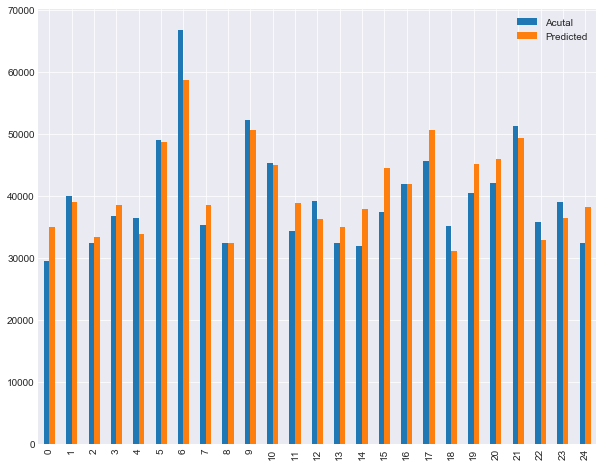

In [172]:
df1.plot(kind='bar', figsize = (10,8))
plt.show()

In [173]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 2902.15060241
Mean Squared Error: 15155461.7169
Root Mean Squared Error: 3893.0016333
